# Climate Change Impact on Birds

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

xls=pd.ExcelFile(r"data\NCRN LAND Bird Monitoring Data 2007 - 2017_Public.xlsx")
sheets=xls.sheet_names

In [129]:
print(sheets)

['ANTI', 'CATO', 'CHOH', 'GWMP', 'HAFE', 'MANA', 'MONO', 'NACE', 'PRWI', 'ROCR', 'WOTR']


In [130]:
parks=['Antietam National Battlefield', 'Catoctin Mountain Park', 'Chesapeake & Ohio Canal National Historical Park', 'George Washington Memorial Parkway', 'Harpers Ferry National Historical Park', 'Manassas National Battlefield Park', 'Monocacy National Battlefield', 'National Capital Parks - East', 'Prince William Forest Park', 'Rock Creek Park', 'Wolf Trap National Park for the Performing Arts']

In [131]:
nat_parks=dict(zip(sheets, parks))
print(nat_parks)

{'ANTI': 'Antietam National Battlefield', 'CATO': 'Catoctin Mountain Park', 'CHOH': 'Chesapeake & Ohio Canal National Historical Park', 'GWMP': 'George Washington Memorial Parkway', 'HAFE': 'Harpers Ferry National Historical Park', 'MANA': 'Manassas National Battlefield Park', 'MONO': 'Monocacy National Battlefield', 'NACE': 'National Capital Parks - East', 'PRWI': 'Prince William Forest Park', 'ROCR': 'Rock Creek Park', 'WOTR': 'Wolf Trap National Park for the Performing Arts'}


In [132]:
dfs={sheet:pd.read_excel(xls, sheet) for sheet in sheets}

In [133]:
df=pd.concat(dfs.values(), ignore_index=True)

In [134]:
df['National Parks']=df['Admin_Unit_Code'].map(nat_parks)

In [135]:
df.isnull().sum()

Admin_Unit_Code                     0
Sub_Unit_Code                  118425
Site_Name                       28386
Plot_Name                           0
Location_Type                      16
Year                                0
Date                                0
Start_Time                         13
End_Time                           13
Observer                            0
Visit                               0
Interval_Length                     3
ID_Method                        4079
Distance                         7324
Flyover_Observed                    0
Sex                              5313
Common_Name                         3
Scientific_Name                     3
AcceptedTSN                       308
NPSTaxonCode                        3
AOU_Code                            3
PIF_Watchlist_Status                0
Regional_Stewardship_Status         0
Temperature                        10
Humidity                           99
Sky                                10
Wind        

In [136]:
df.shape

(126573, 30)

In [137]:
print(df.sample(5))

      Admin_Unit_Code Sub_Unit_Code Site_Name  Plot_Name Location_Type  Year  \
39749            CHOH           NaN    CHOH 7  CHOH-0012        Forest  2014   
71391            MANA           NaN       NaN  MANA-0171     Grassland  2014   
34532            CHOH           NaN   CHOH 16  CHOH-1226        Forest  2015   
93312            PRWI           NaN    PRWI 2  PRWI-0082        Forest  2007   
89061            NACE          FODU    NACE 3  NACE-0253        Forest  2007   

            Date Start_Time  End_Time         Observer  ...  AOU_Code  \
39749 2014-06-08   06:35:00  06:45:00    Chris Hensley  ...      YTWA   
71391 2014-07-06   05:24:00  05:34:00    Nick Jennings  ...      MODO   
34532 2015-05-28   08:11:00  08:21:00     Josh Schlict  ...      CARW   
93312 2007-05-29   07:49:00  08:07:00  Desiree Narango  ...      OVEN   
89061 2007-07-23   07:29:00  07:45:00    Sarah Goodwin  ...      AMCR   

      PIF_Watchlist_Status Regional_Stewardship_Status Temperature   Humidity  \

In [138]:
df=df.dropna(subset=['Plot_Name','Location_Type', 'Date', 'Common_Name', 'Scientific_Name', 'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance'])

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126455 entries, 0 to 126572
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Admin_Unit_Code              126455 non-null  object        
 1   Sub_Unit_Code                8138 non-null    object        
 2   Site_Name                    98069 non-null   object        
 3   Plot_Name                    126455 non-null  object        
 4   Location_Type                126455 non-null  object        
 5   Year                         126455 non-null  int64         
 6   Date                         126455 non-null  datetime64[ns]
 7   Start_Time                   126442 non-null  object        
 8   End_Time                     126442 non-null  object        
 9   Observer                     126455 non-null  object        
 10  Visit                        126455 non-null  int64         
 11  Interval_Length              12

In [140]:
df.describe()

Year                           Date          Visit  \
count  126455.000000                         126455  126455.000000   
mean     2012.870199  2013-04-29 09:44:44.050452736       1.589190   
min      2007.000000            2007-05-04 00:00:00       1.000000   
25%      2010.000000            2010-06-22 00:00:00       1.000000   
50%      2014.000000            2014-05-22 00:00:00       2.000000   
75%      2016.000000            2016-05-25 00:00:00       2.000000   
max      2017.000000            2017-07-19 00:00:00       4.000000   
std         3.219391                            NaN       0.618818   

         AcceptedTSN   NPSTaxonCode    Temperature       Humidity  
count  126150.000000  126455.000000  126455.000000  126455.000000  
mean   237476.842806  131002.583156      20.745349      76.213215  
min     93549.000000       0.000000       0.000000       0.000000  
25%    178532.000000   85846.000000      18.200001      71.800003  
50%    179112.000000   88296.000000      21.100000      80.000000  
75%    179759.000000   94215.000000      23.600000      86.300003  
max    950106.000000  926917.000000      43.500000      99.000000  
std    169537.534618  146469.062563       4.597715      17.101756

In [141]:
df.isnull().sum()

Admin_Unit_Code                     0
Sub_Unit_Code                  118317
Site_Name                       28386
Plot_Name                           0
Location_Type                       0
Year                                0
Date                                0
Start_Time                         13
End_Time                           13
Observer                            0
Visit                               0
Interval_Length                     0
ID_Method                        4076
Distance                         7317
Flyover_Observed                    0
Sex                              5310
Common_Name                         0
Scientific_Name                     0
AcceptedTSN                       305
NPSTaxonCode                        0
AOU_Code                            0
PIF_Watchlist_Status                0
Regional_Stewardship_Status         0
Temperature                         0
Humidity                            0
Sky                                 0
Wind        

In [142]:
df.duplicated().sum()

np.int64(6119)

In [143]:
df.shape

(126455, 30)

In [144]:
df.nunique()

Admin_Unit_Code                 11
Sub_Unit_Code                    8
Site_Name                       70
Plot_Name                      628
Location_Type                    2
Year                            11
Date                           545
Start_Time                     354
End_Time                       359
Observer                        32
Visit                            4
Interval_Length                  4
ID_Method                        3
Distance                         2
Flyover_Observed                 2
Sex                              3
Common_Name                    181
Scientific_Name                180
AcceptedTSN                    177
NPSTaxonCode                   180
AOU_Code                       181
PIF_Watchlist_Status             2
Regional_Stewardship_Status      2
Temperature                    293
Humidity                       589
Sky                              6
Wind                             6
Disturbance                      4
Initial_Three_Min_Cn

In [145]:
num_cols=df.select_dtypes(include=[int, float])
print(num_cols.columns)

Index(['Year', 'Visit', 'AcceptedTSN', 'NPSTaxonCode', 'Temperature',
       'Humidity'],
      dtype='object')


In [146]:
selected_num_cols=['Year', 'Visit', 'Temperature', 'Humidity']

In [147]:
corr_mat=df[selected_num_cols].corr()
print(corr_mat)

                 Year     Visit  Temperature  Humidity
Year         1.000000  0.158222     0.076148  0.091732
Visit        0.158222  1.000000     0.333446  0.144832
Temperature  0.076148  0.333446     1.000000  0.077657
Humidity     0.091732  0.144832     0.077657  1.000000


In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

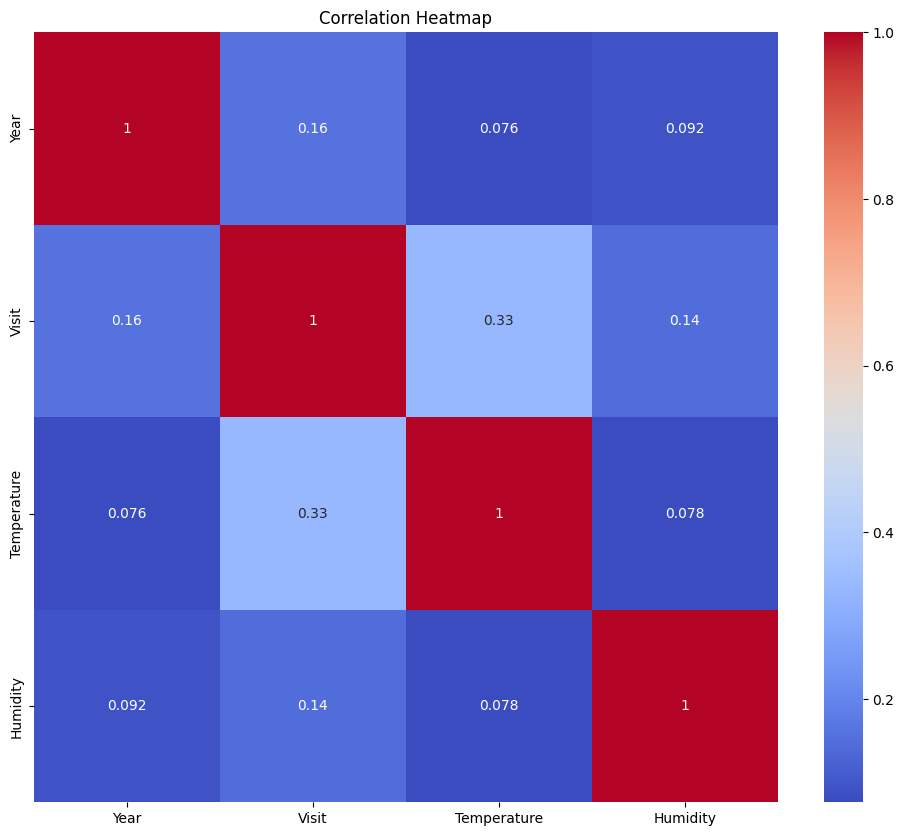

In [149]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [150]:
cat_cols=df.select_dtypes(include=['object','category']).columns
print(cat_cols)

Index(['Admin_Unit_Code', 'Sub_Unit_Code', 'Site_Name', 'Plot_Name',
       'Location_Type', 'Start_Time', 'End_Time', 'Observer',
       'Interval_Length', 'ID_Method', 'Distance', 'Sex', 'Common_Name',
       'Scientific_Name', 'AOU_Code', 'Sky', 'Wind', 'Disturbance',
       'National Parks'],
      dtype='object')


In [151]:
selected_cat_columns=['National Parks','Location_Type', 'Sex', 'Sky', 'Wind', 'Disturbance']

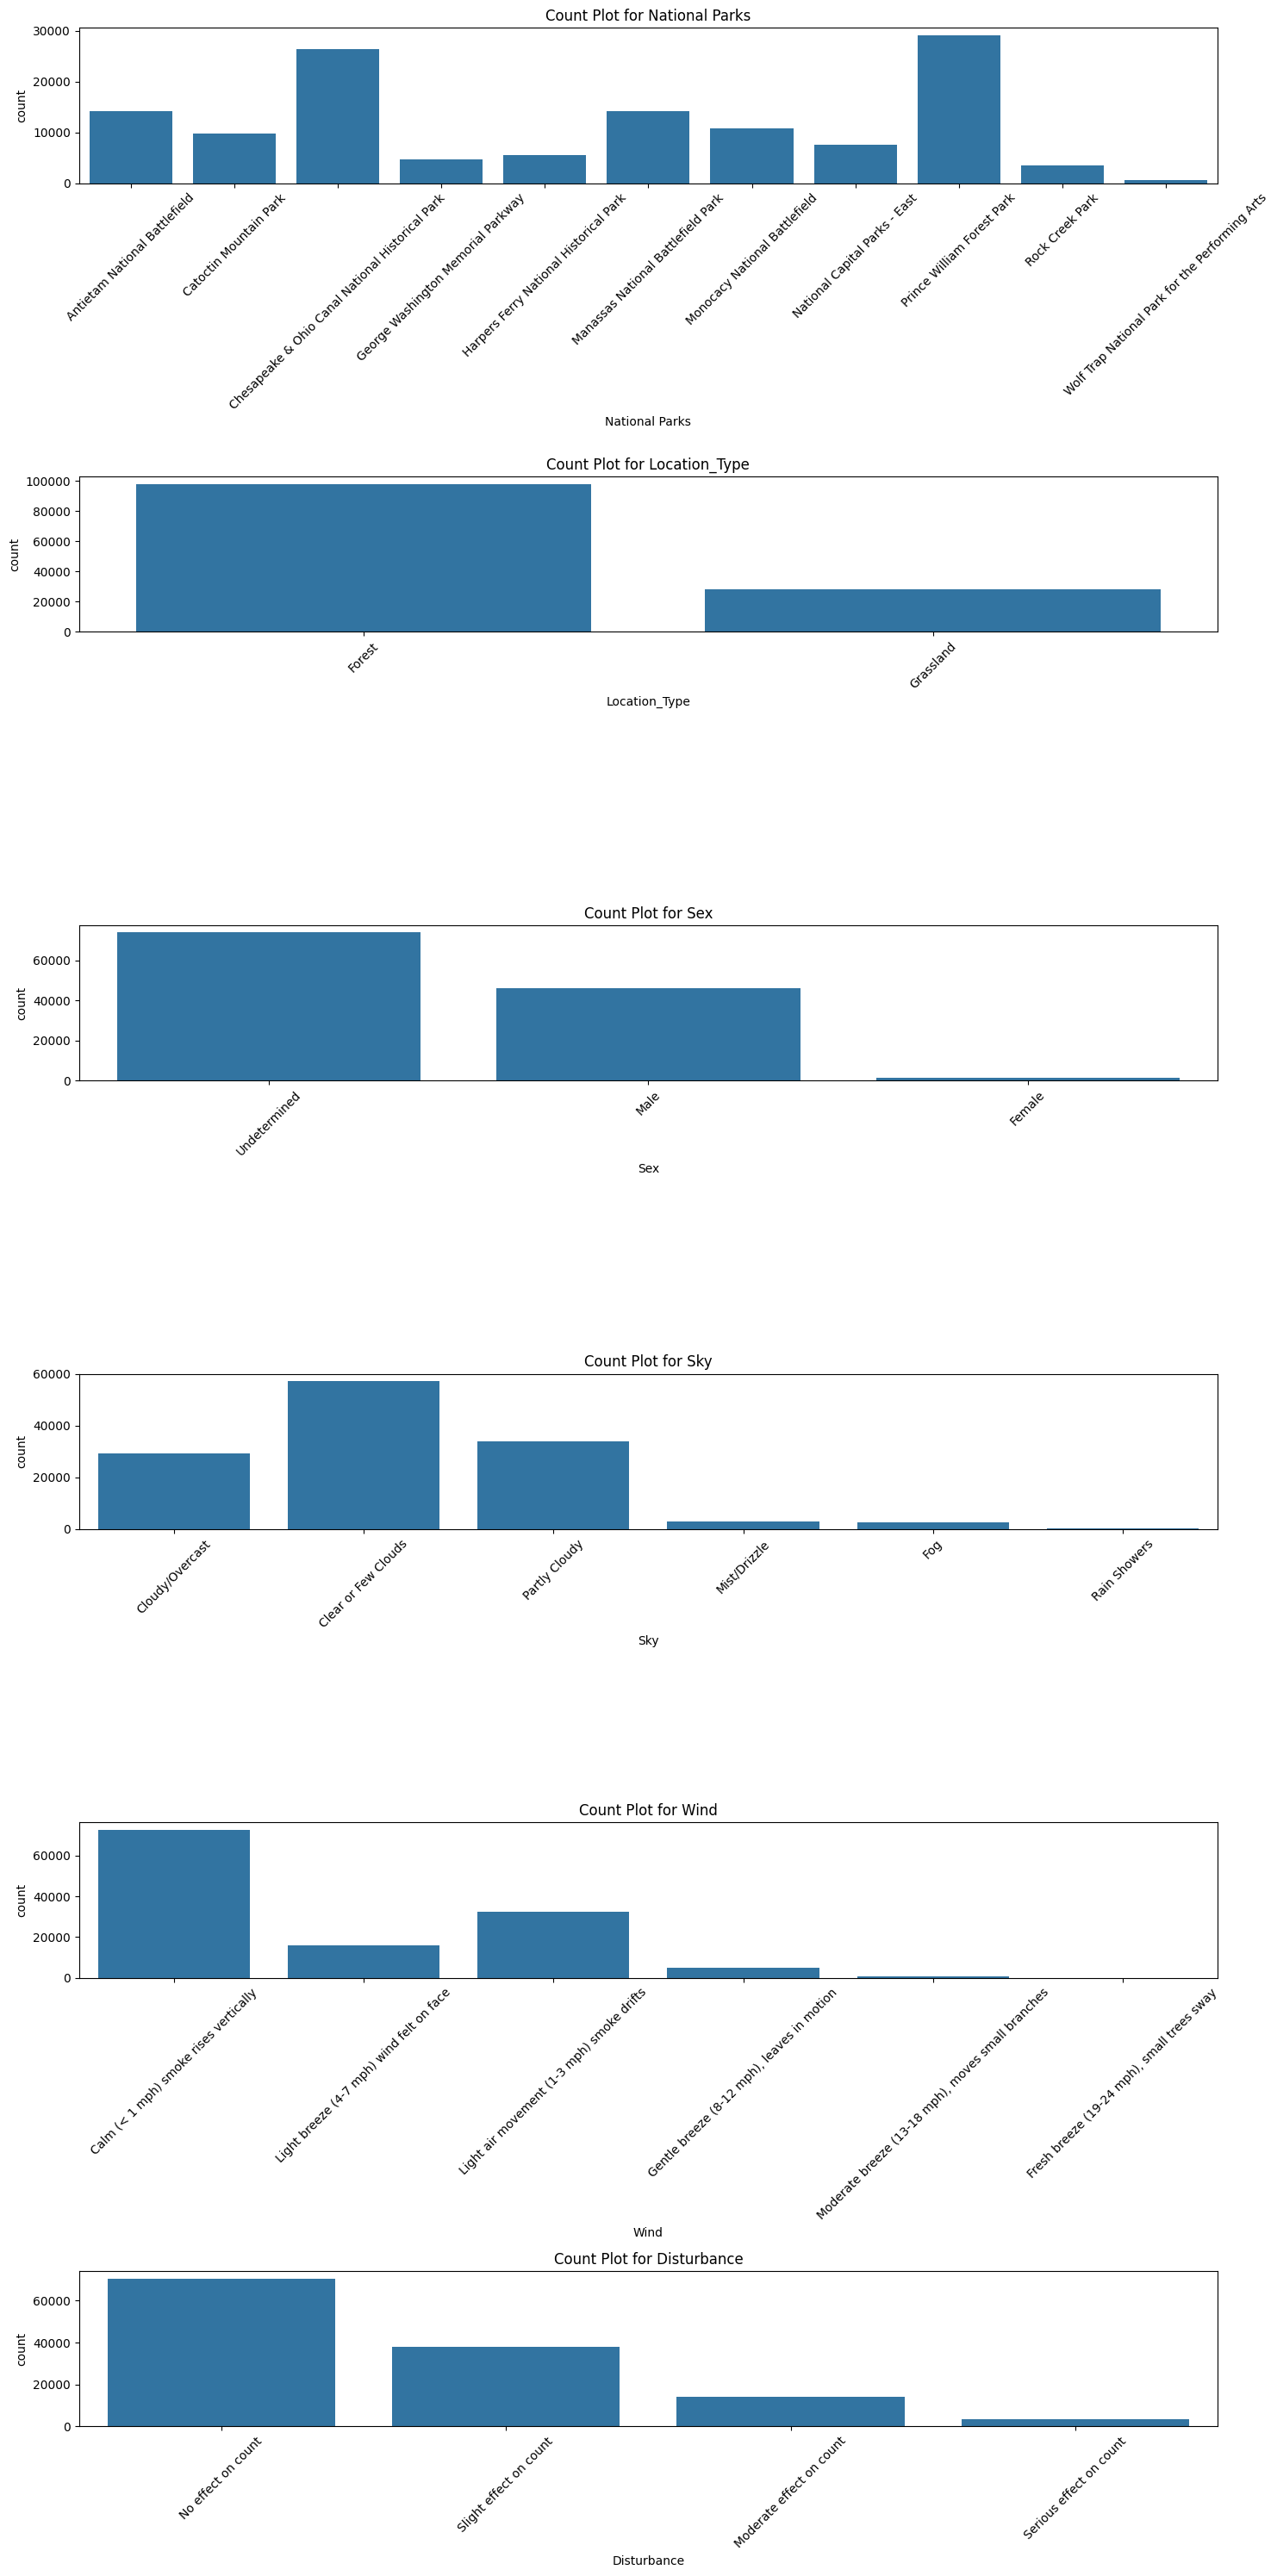

In [152]:
fig, axes = plt.subplots(len(selected_cat_columns), 1, figsize=(15, 5 * len(selected_cat_columns)))

for ax, column in zip(axes, selected_cat_columns):
    sns.countplot(data=df, x=column, ax=ax)
    ax.set_title(f'Count Plot for {column}')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

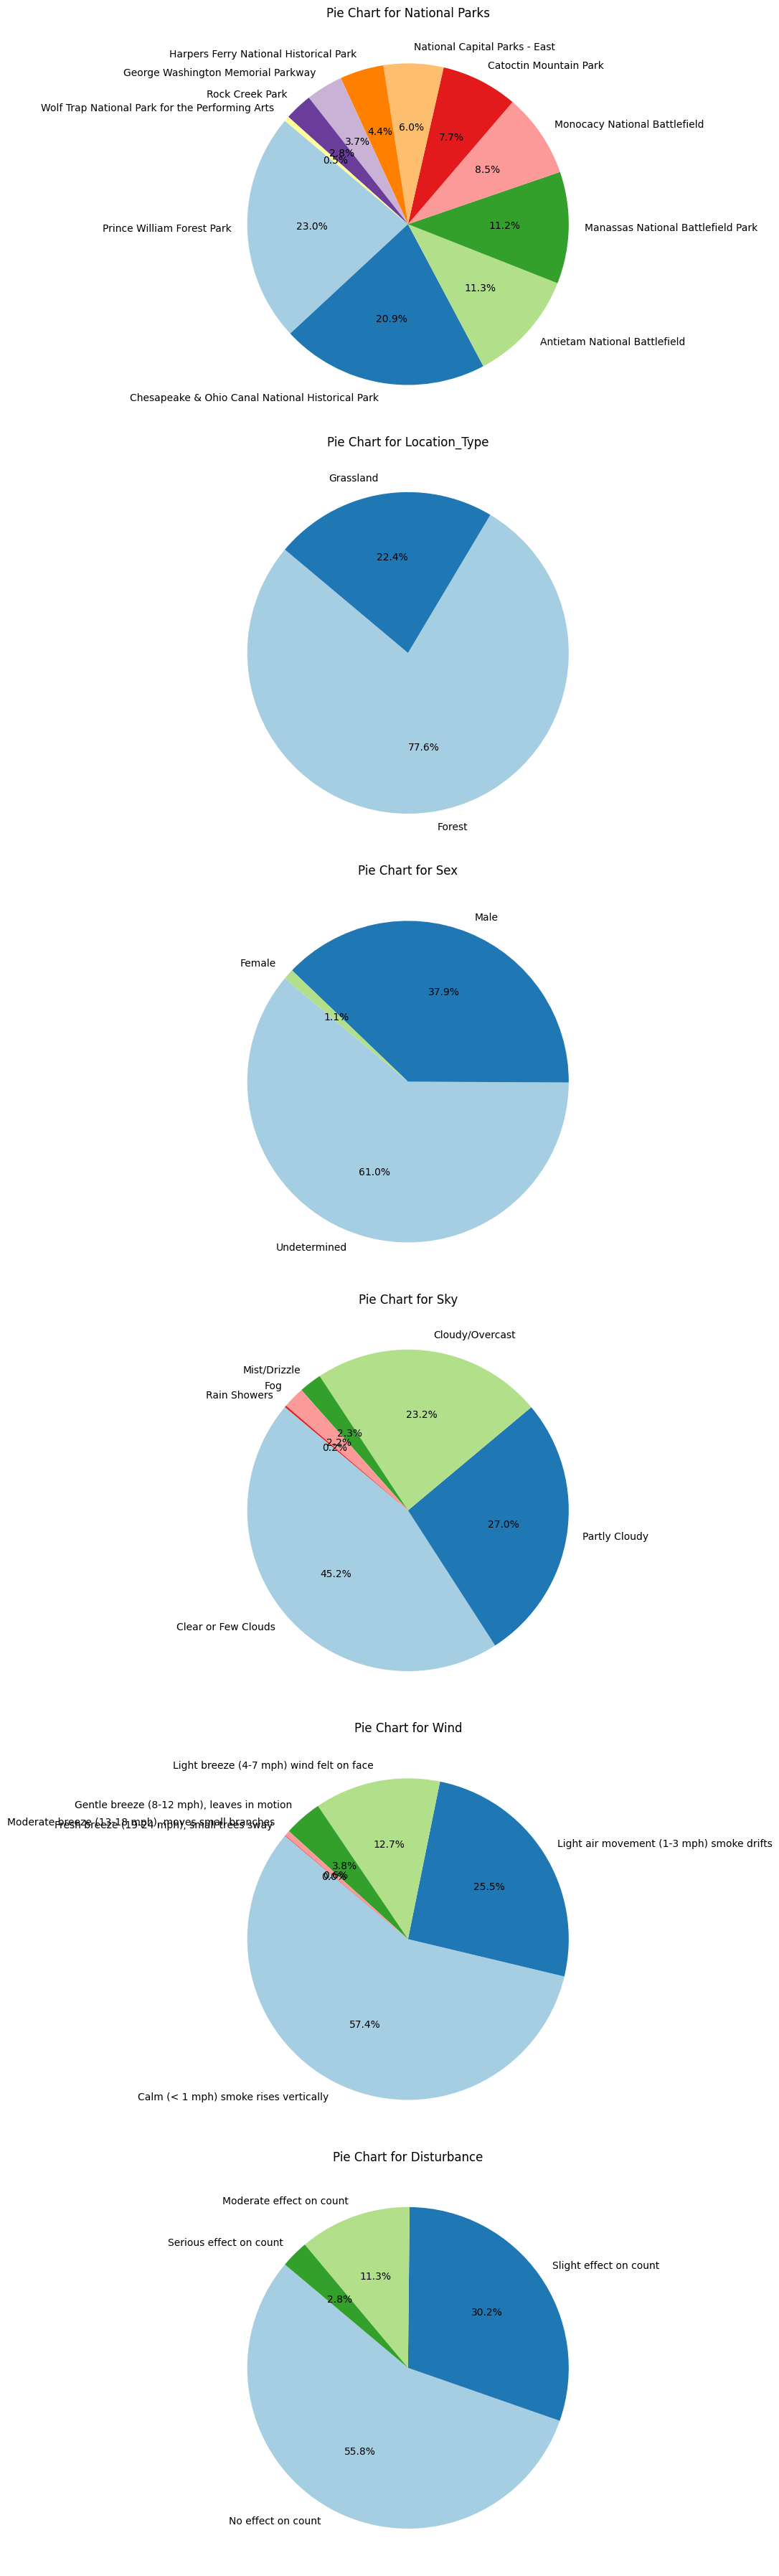

In [153]:
fig, axes=plt.subplots(len(selected_cat_columns), 1, figsize=(10, 6*len(selected_cat_columns)))

for ax, column in zip(axes, selected_cat_columns):
    data=df[column].value_counts()
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    ax.set_title(f'Pie Chart for {column}')

plt.tight_layout()
plt.show()

(array([ 8899.,  9835.,  7513.,  8718.,  8467.,  7789.,  9794., 14650.,
        16993., 33797.]),
 array([2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
        2016., 2017.]),
 <BarContainer object of 10 artists>)

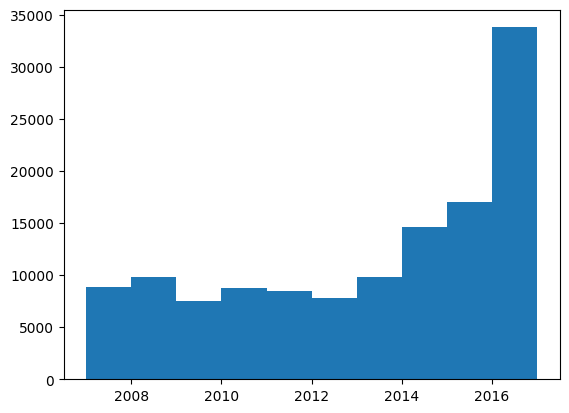

In [154]:
plt.hist(df['Year'])

Text(0.5, 1.0, 'Distribution of Temperature')

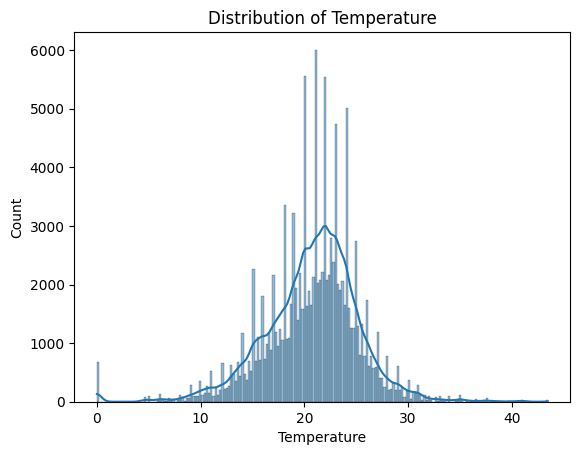

In [155]:
sns.histplot(df['Temperature'], kde=True)
plt.title('Distribution of Temperature')

Text(0.5, 1.0, 'Distribution of Humidity')

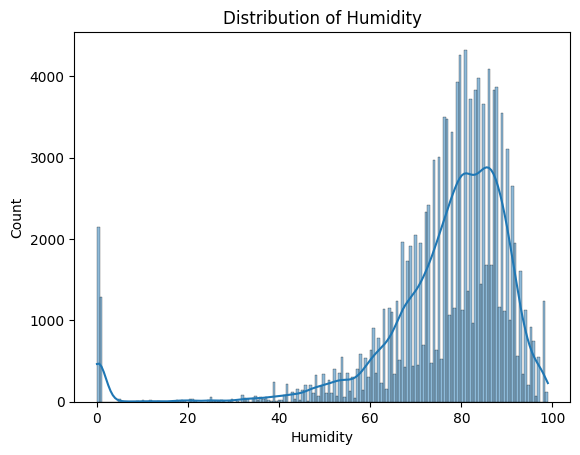

In [156]:
sns.histplot(df['Humidity'], kde=True)
plt.title('Distribution of Humidity')

Analysis for Antietam National Battlefield
               Year                           Date         Visit  \
count  14230.000000                          14230  14230.000000   
mean    2015.403373  2015-11-12 10:17:29.388615424      1.868728   
min     2007.000000            2007-05-11 00:00:00      1.000000   
25%     2015.000000            2015-06-22 00:00:00      1.000000   
50%     2016.000000            2016-05-24 00:00:00      2.000000   
75%     2017.000000            2017-05-28 00:00:00      3.000000   
max     2017.000000            2017-07-17 00:00:00      3.000000   
std        1.995262                            NaN      0.788150   

         AcceptedTSN   NPSTaxonCode   Temperature      Humidity  
count   14105.000000   14230.000000  14230.000000  14230.000000  
mean   201008.876569  108631.739002     22.159691     78.458883  
min    174773.000000       0.000000      0.000000      0.000000  
25%    178581.000000   84865.000000     18.799999     72.800003  
50%    179150.

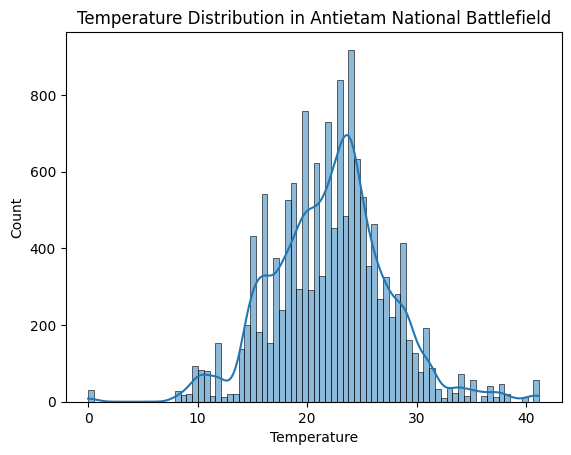

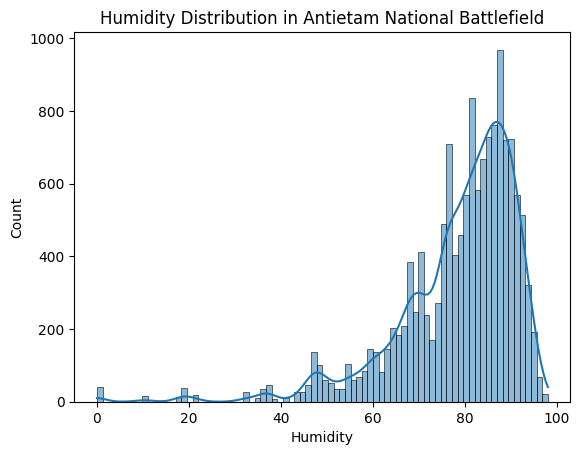

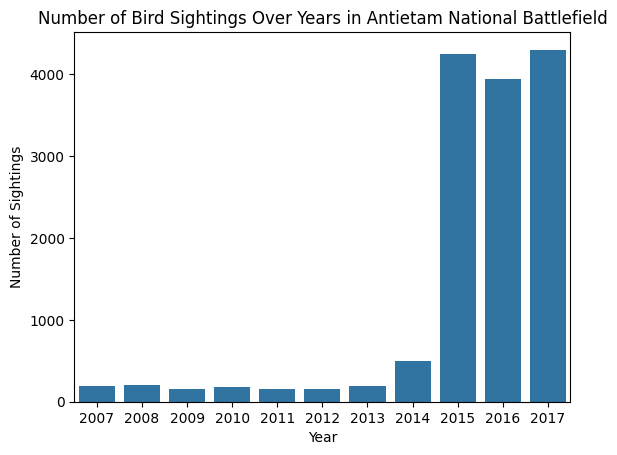

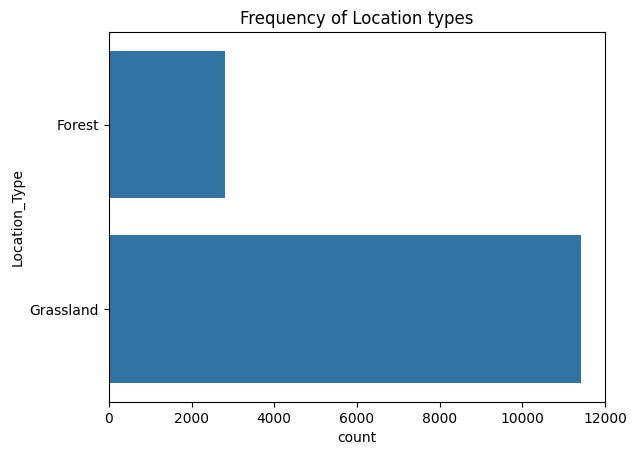

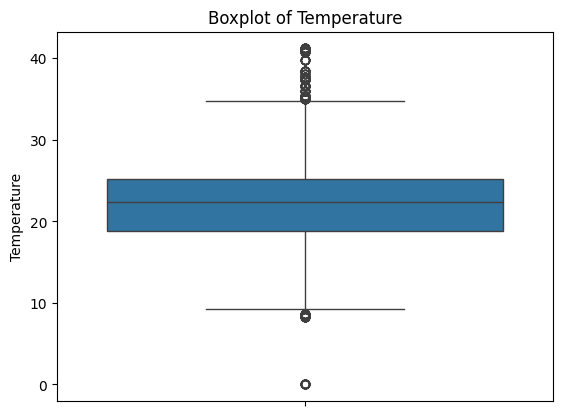

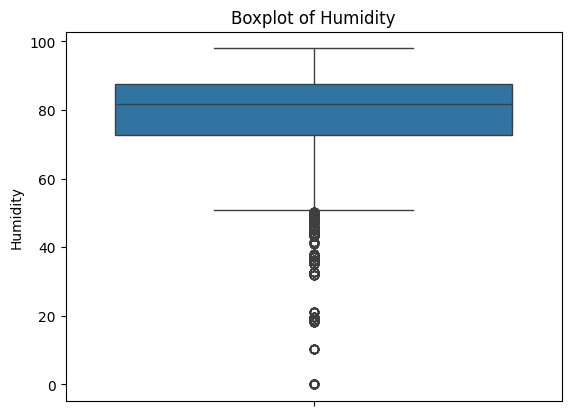

Analysis for Catoctin Mountain Park
              Year                           Date        Visit    AcceptedTSN  \
count  9740.000000                           9740  9740.000000    9735.000000   
mean   2011.932957  2012-05-25 10:41:03.080082176     1.489220  226638.770005   
min    2007.000000            2007-05-21 00:00:00     1.000000  174773.000000   
25%    2009.000000            2009-07-13 00:00:00     1.000000  178359.000000   
50%    2012.000000            2012-07-07 00:00:00     1.000000  179021.000000   
75%    2015.000000            2015-06-16 00:00:00     2.000000  179777.000000   
max    2017.000000            2017-07-02 00:00:00     2.000000  950097.000000   
std       3.184139                            NaN     0.499909  156459.048367   

        NPSTaxonCode  Temperature     Humidity  
count    9740.000000  9740.000000  9740.000000  
mean   121252.984086    19.720708    75.647262  
min         0.000000     0.000000     0.000000  
25%     85846.000000    17.799999    7

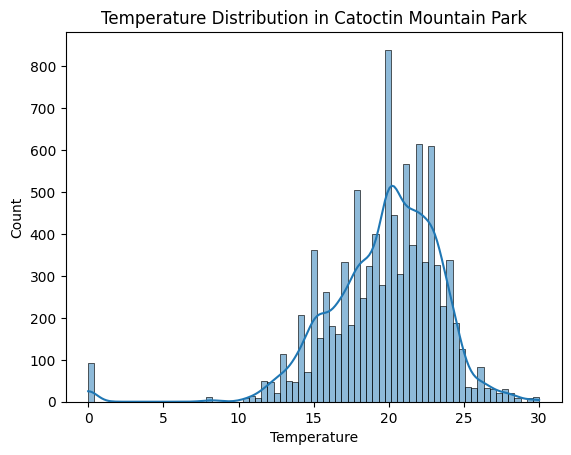

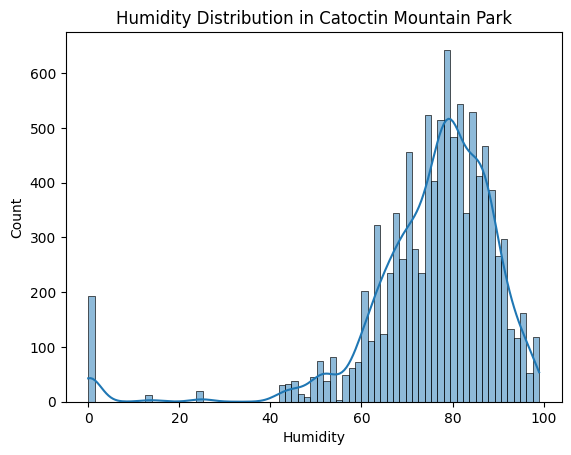

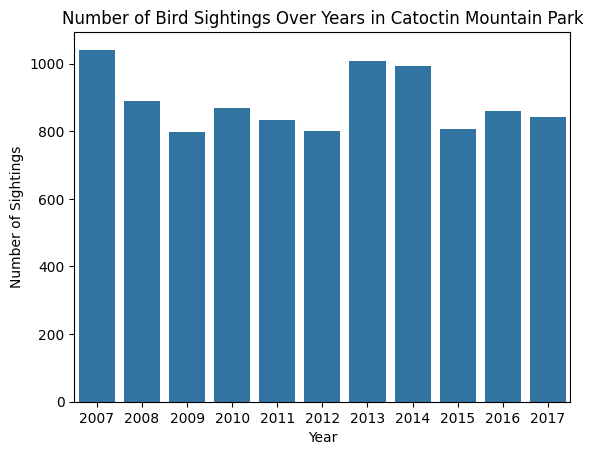

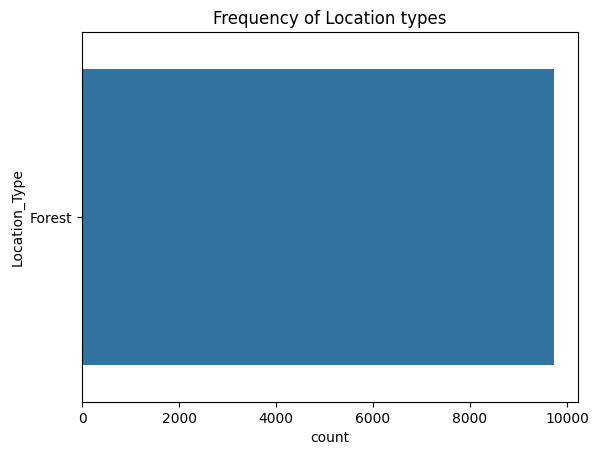

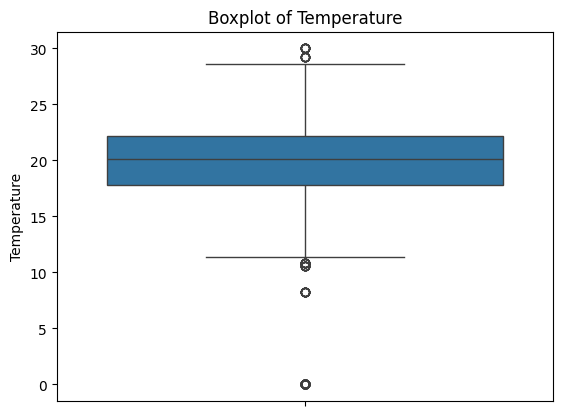

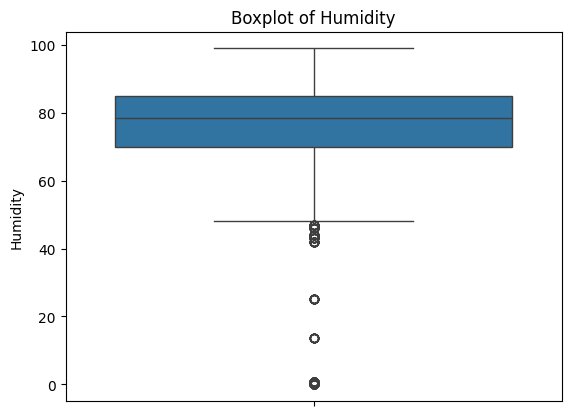

Analysis for Chesapeake & Ohio Canal National Historical Park
               Year                           Date         Visit  \
count  26374.000000                          26374  26374.000000   
mean    2012.065519  2012-07-10 04:55:22.908925440      1.480246   
min     2007.000000            2007-05-04 00:00:00      1.000000   
25%     2009.000000            2009-07-16 00:00:00      1.000000   
50%     2012.000000            2012-07-05 00:00:00      1.000000   
75%     2015.000000            2015-05-31 00:00:00      2.000000   
max     2017.000000            2017-07-11 00:00:00      4.000000   
std        3.141808                            NaN      0.504152   

         AcceptedTSN   NPSTaxonCode   Temperature      Humidity  
count   26355.000000   26374.000000  26374.000000  26374.000000  
mean   247725.092279  136769.638394     20.948937     74.226165  
min    174650.000000       0.000000      0.000000      0.000000  
25%    178359.000000   85846.000000     19.000000     70.0000

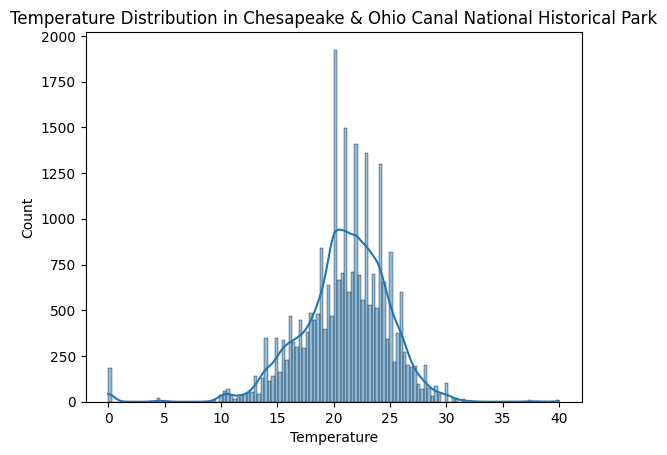

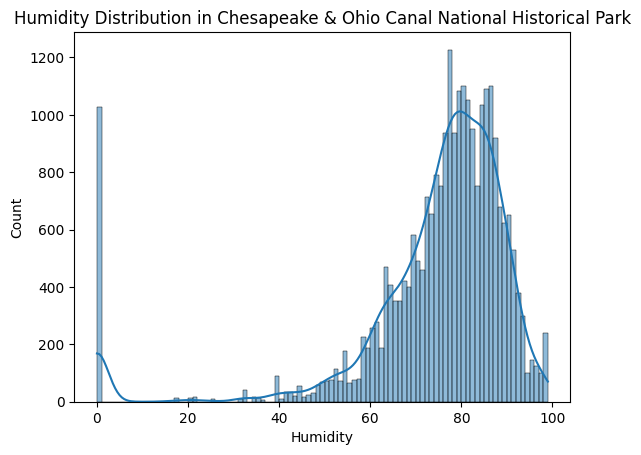

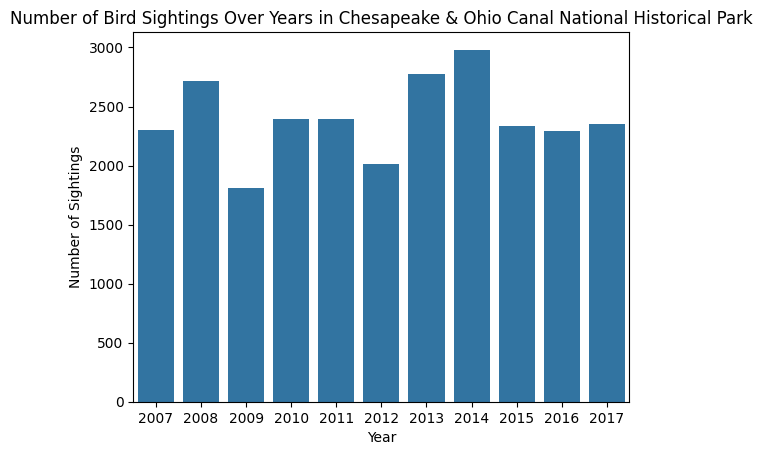

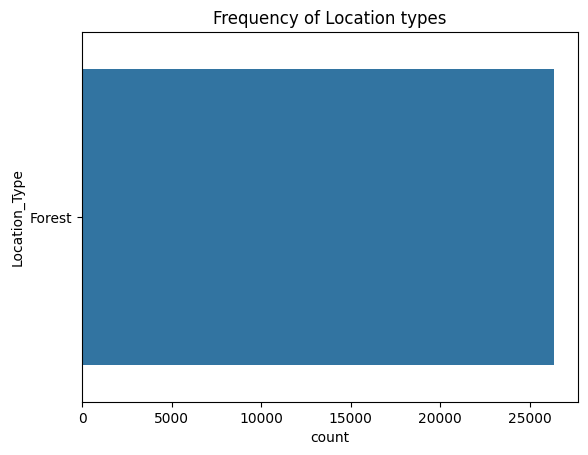

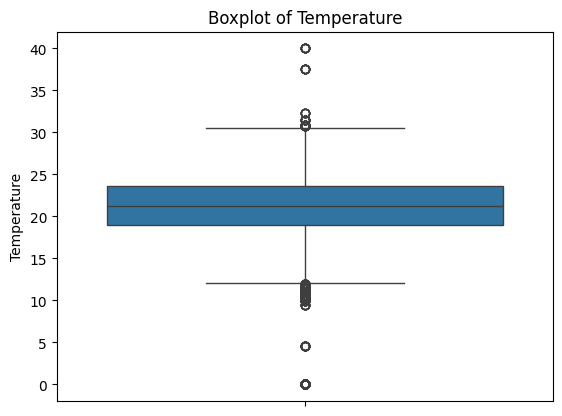

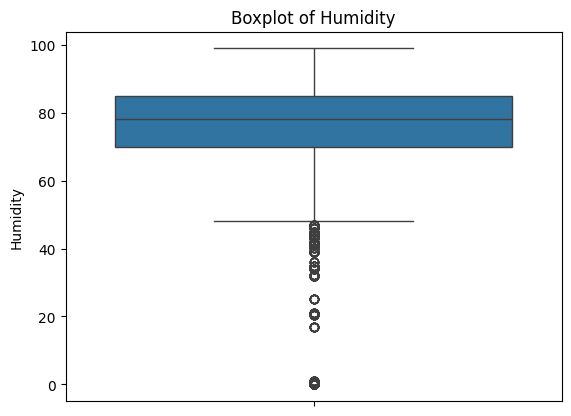

Analysis for George Washington Memorial Parkway
              Year                           Date        Visit    AcceptedTSN  \
count  4696.000000                           4696  4696.000000    4684.000000   
mean   2011.800894  2012-03-26 15:33:25.451448064     1.480622  245408.741674   
min    2007.000000            2007-05-04 00:00:00     1.000000  174717.000000   
25%    2009.000000            2009-06-26 00:00:00     1.000000  178581.000000   
50%    2012.000000            2012-05-24 00:00:00     1.000000  179124.000000   
75%    2014.000000            2014-06-16 00:00:00     2.000000  179759.000000   
max    2017.000000            2017-07-19 00:00:00     2.000000  950079.000000   
std       3.106654                            NaN     0.499678  171421.365225   

        NPSTaxonCode  Temperature     Humidity  
count    4696.000000  4696.000000  4696.000000  
mean   131659.282155    20.345997    76.527206  
min         0.000000     9.000000     0.000000  
25%     86252.000000    18

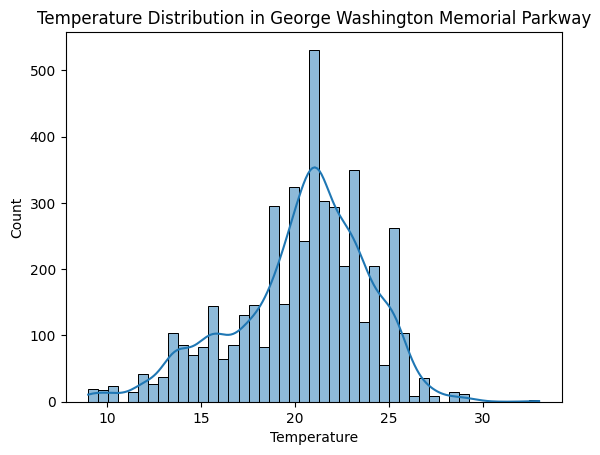

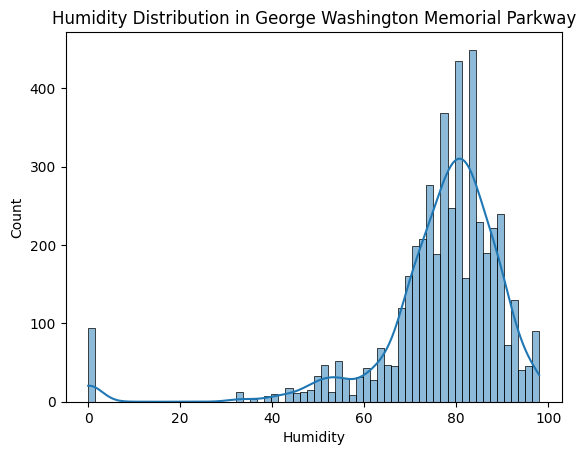

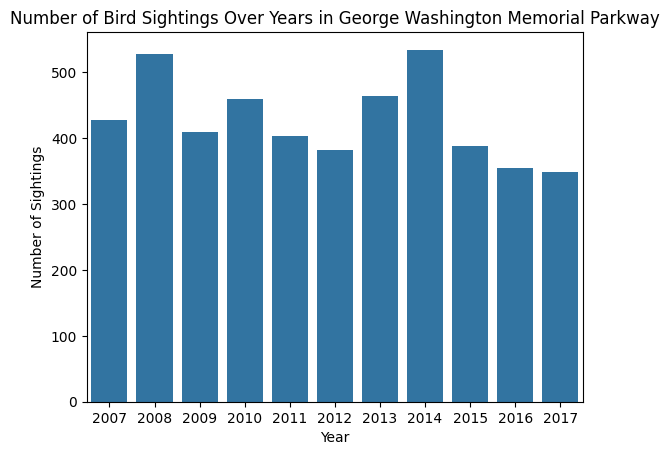

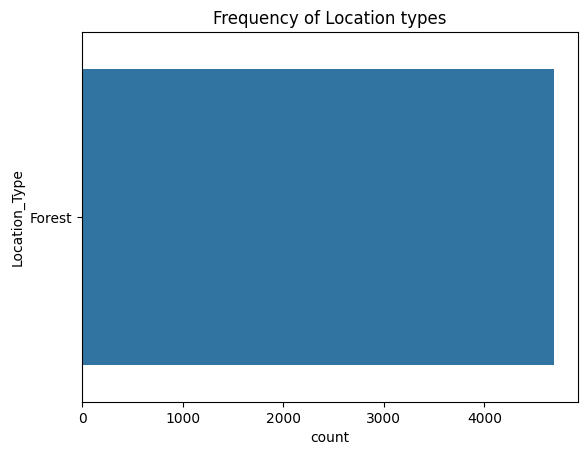

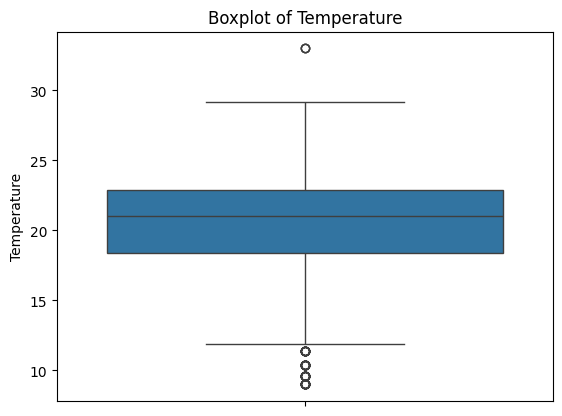

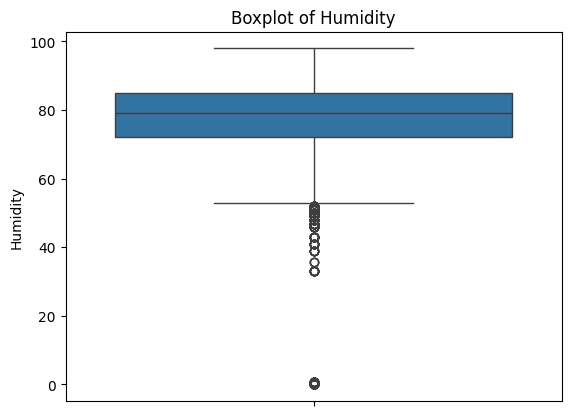

Analysis for Harpers Ferry National Historical Park
              Year                           Date        Visit    AcceptedTSN  \
count  5579.000000                           5579  5579.000000    5559.000000   
mean   2012.165621  2012-08-09 14:23:53.805341440     1.526259  227271.084188   
min    2007.000000            2007-05-16 00:00:00     1.000000   93549.000000   
25%    2009.000000            2009-06-29 00:00:00     1.000000  178359.000000   
50%    2012.000000            2012-07-02 00:00:00     2.000000  179112.000000   
75%    2015.000000            2015-07-09 00:00:00     2.000000  179731.000000   
max    2017.000000            2017-07-09 00:00:00     3.000000  950106.000000   
std       3.201687                            NaN     0.512816  139759.954101   

        NPSTaxonCode  Temperature     Humidity  
count    5579.000000  5579.000000  5579.000000  
mean   118732.842803    20.605897    73.817984  
min         0.000000     0.000000     0.000000  
25%     85846.000000  

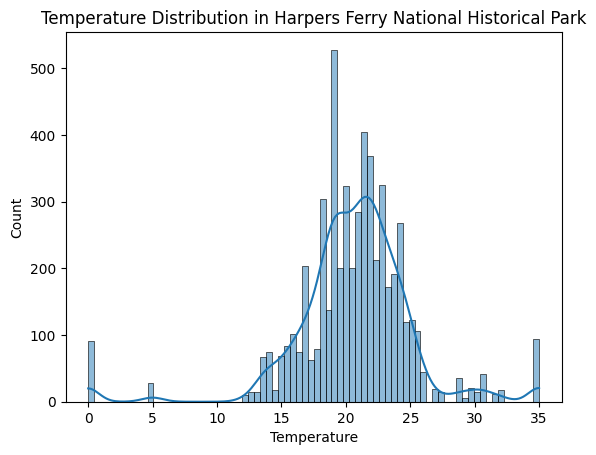

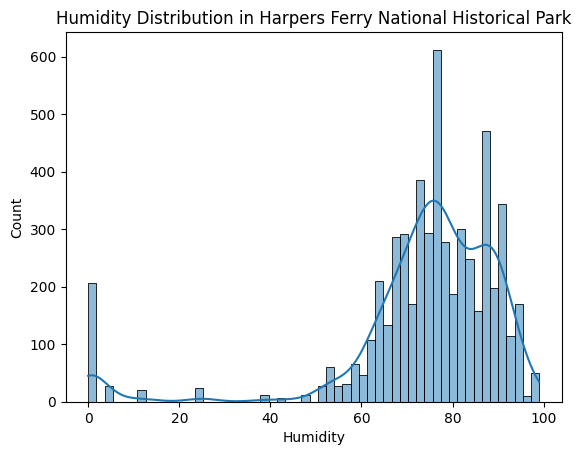

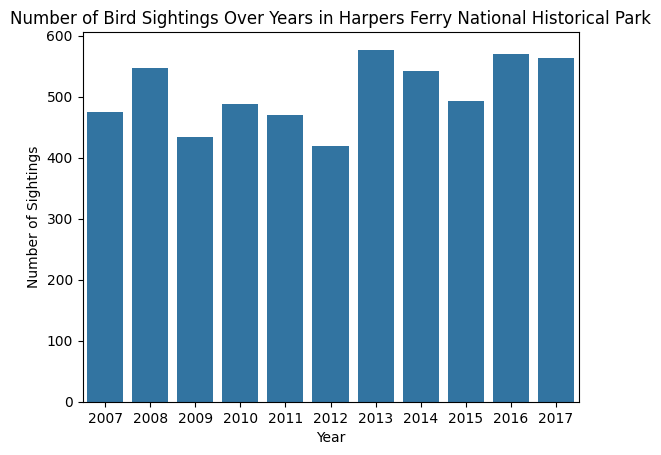

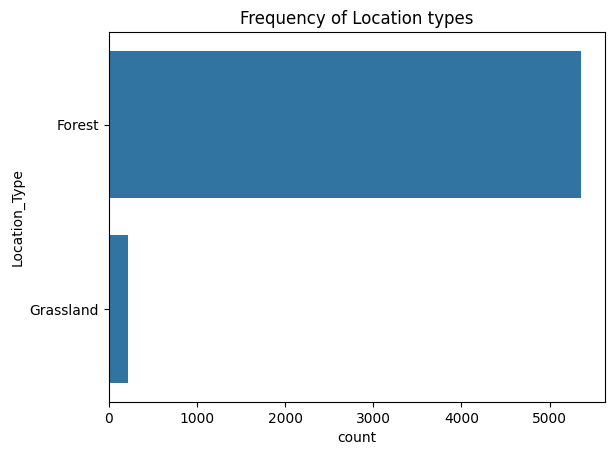

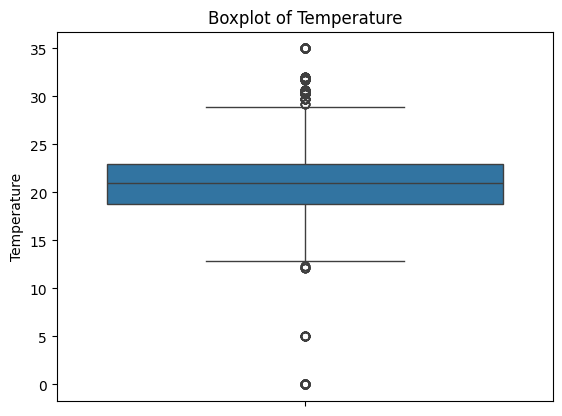

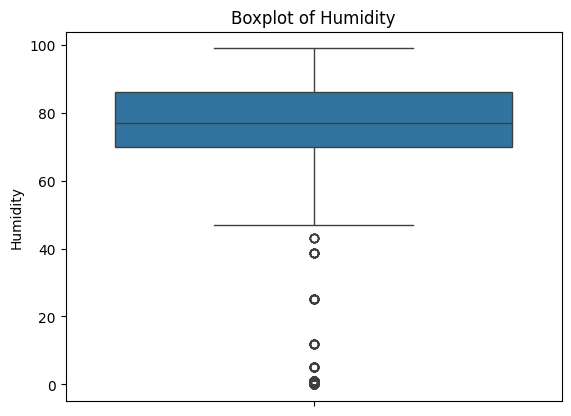

Analysis for Manassas National Battlefield Park
               Year                           Date         Visit  \
count  14222.000000                          14222  14222.000000   
mean    2013.687104  2014-02-15 16:06:14.630853632      1.716917   
min     2007.000000            2007-05-08 00:00:00      1.000000   
25%     2013.000000            2013-05-27 00:00:00      1.000000   
50%     2014.000000            2014-06-11 00:00:00      2.000000   
75%     2016.000000            2016-05-20 00:00:00      2.000000   
max     2017.000000            2017-07-13 00:00:00      3.000000   
std        2.784019                            NaN      0.726327   

         AcceptedTSN   NPSTaxonCode   Temperature      Humidity  
count   14187.000000   14222.000000  14222.000000  14222.000000  
mean   235098.448086  132635.966179     19.825446     74.086098  
min    174717.000000       0.000000      0.000000      0.000000  
25%    178620.000000   85846.000000     15.600000     67.000000  
50%    17

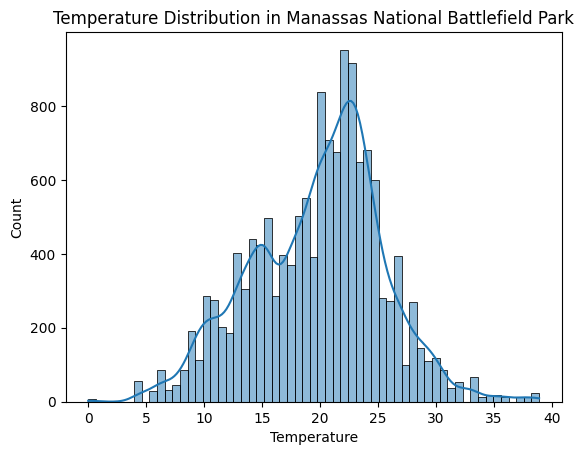

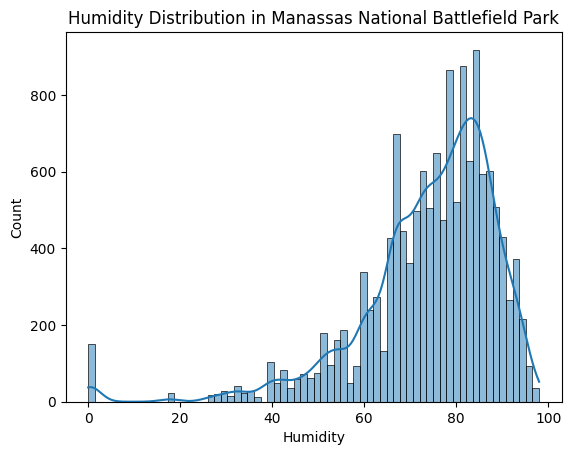

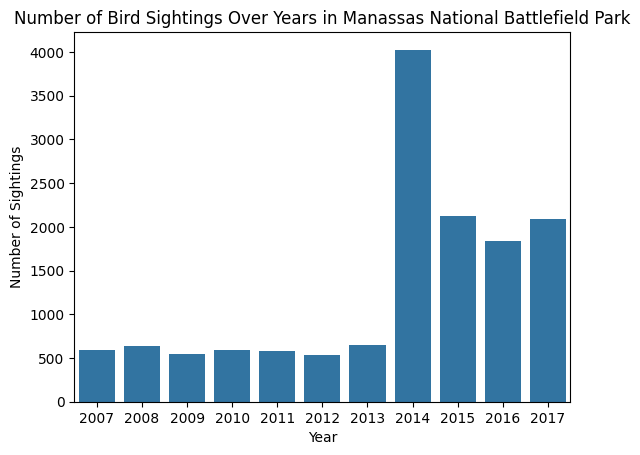

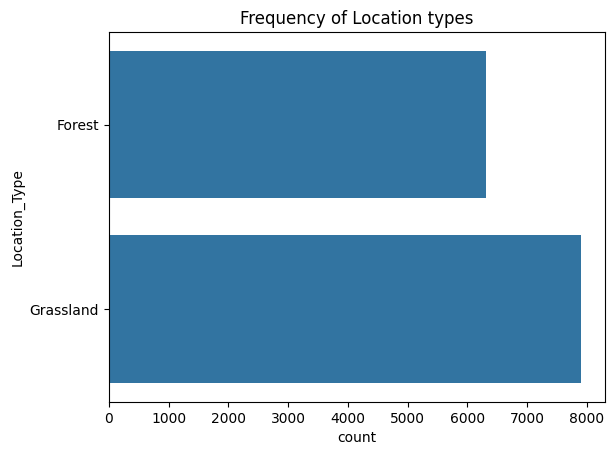

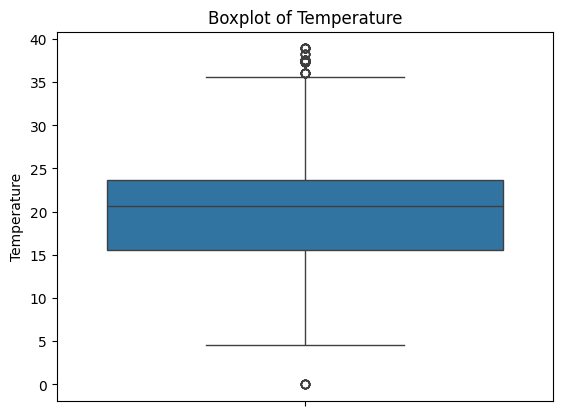

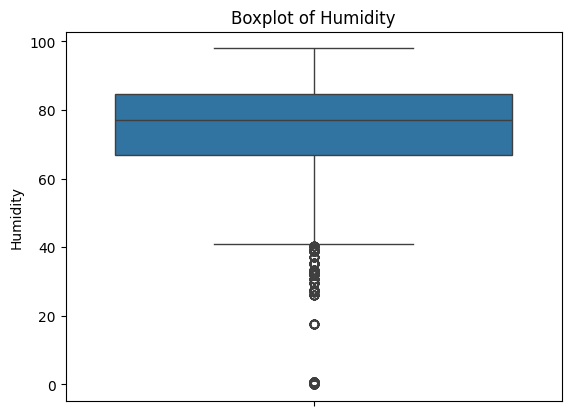

Analysis for Monocacy National Battlefield
               Year                           Date         Visit  \
count  10708.000000                          10708  10708.000000   
mean    2015.663803  2016-02-10 20:43:39.648860672      1.885880   
min     2007.000000            2007-05-14 00:00:00      1.000000   
25%     2015.000000            2015-06-19 00:00:00      1.000000   
50%     2016.000000            2016-06-19 00:00:00      2.000000   
75%     2017.000000            2017-05-08 00:00:00      3.000000   
max     2017.000000            2017-07-14 00:00:00      3.000000   
std        1.551028                            NaN      0.800471   

         AcceptedTSN   NPSTaxonCode   Temperature      Humidity  
count   10661.000000   10708.000000  10708.000000  10708.000000  
mean   206847.809399  105338.435282     19.975579     75.623739  
min    174717.000000       0.000000      4.600000      9.000000  
25%    178581.000000   86204.000000     16.100000     68.099998  
50%    179124.

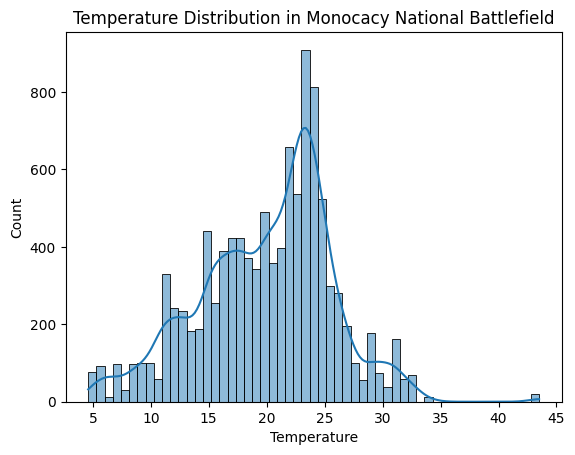

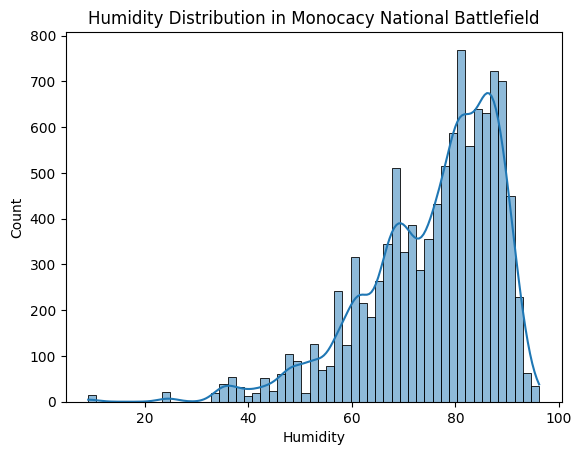

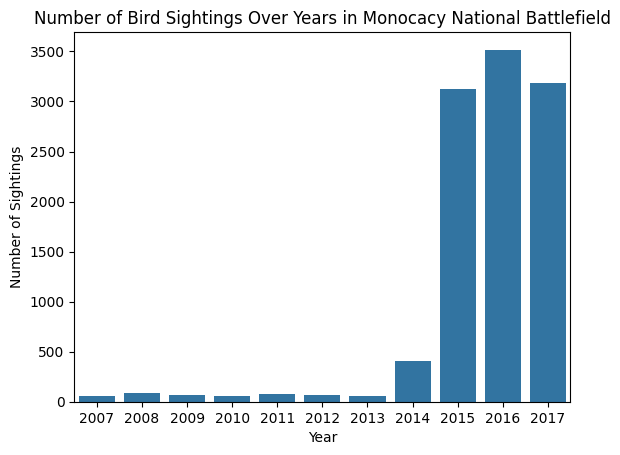

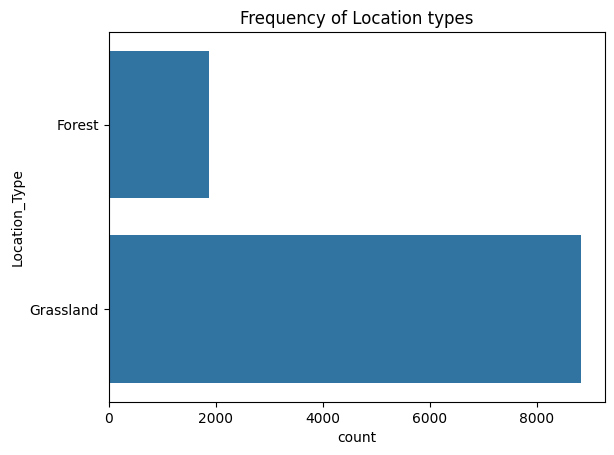

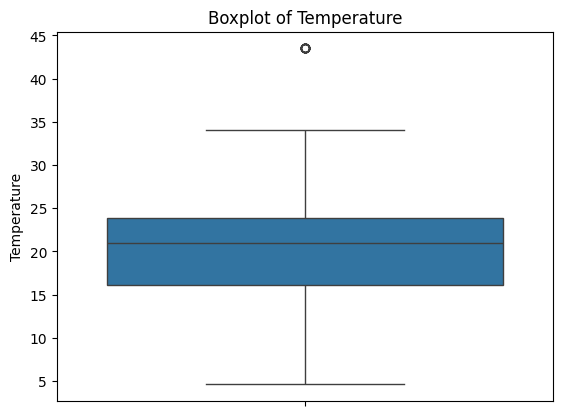

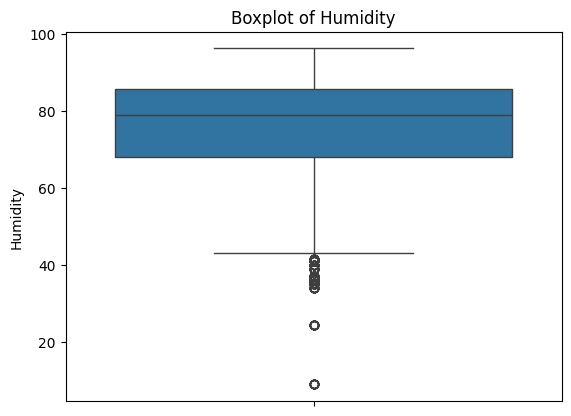

Analysis for National Capital Parks - East
              Year                           Date        Visit    AcceptedTSN  \
count  7613.000000                           7613  7613.000000    7592.000000   
mean   2011.819388  2012-04-06 04:05:19.663732992     1.484040  247119.188093   
min    2007.000000            2007-06-14 00:00:00     1.000000  174717.000000   
25%    2009.000000            2009-06-04 00:00:00     1.000000  178581.000000   
50%    2012.000000            2012-05-27 00:00:00     1.000000  179124.000000   
75%    2014.000000            2014-06-18 00:00:00     2.000000  179759.000000   
max    2017.000000            2017-06-14 00:00:00     2.000000  950097.000000   
std       3.153722                            NaN     0.499778  176399.018213   

        NPSTaxonCode  Temperature     Humidity  
count    7613.000000  7613.000000  7613.000000  
mean   136377.694601    20.640076    71.795299  
min         0.000000     0.000000     0.000000  
25%     86204.000000    18.1000

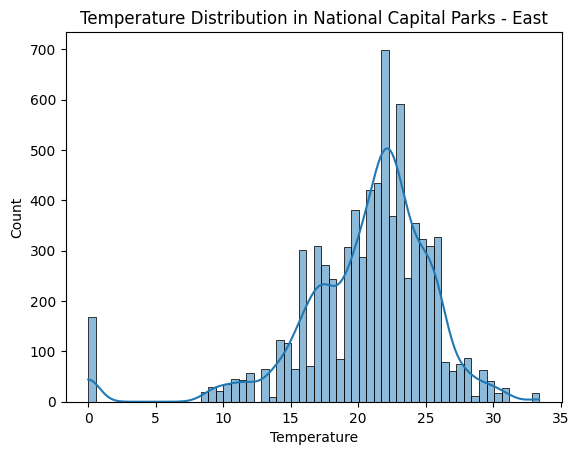

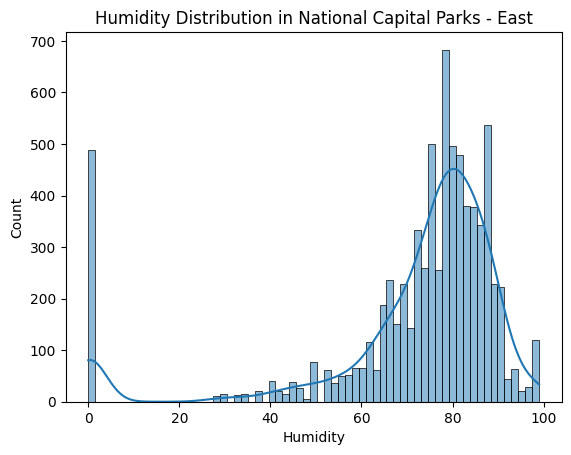

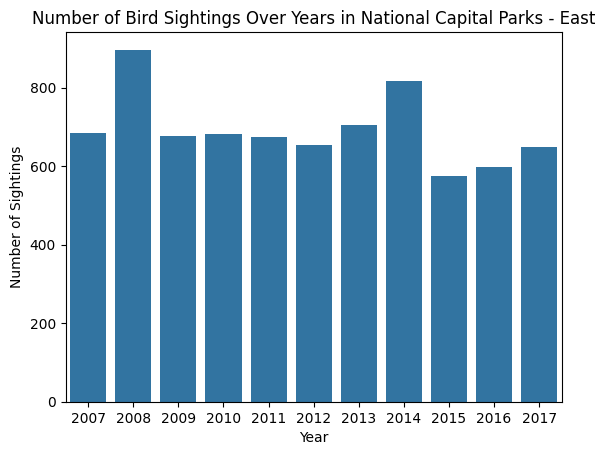

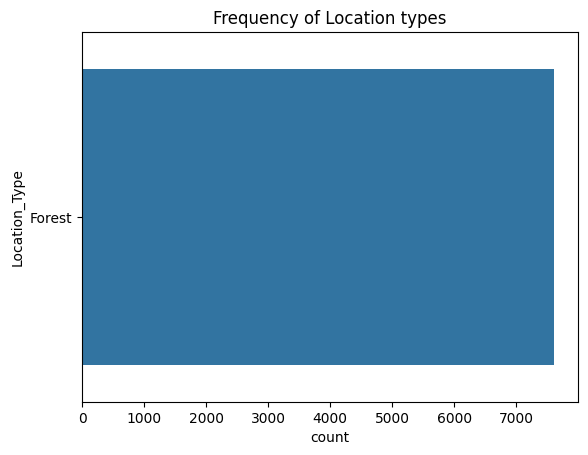

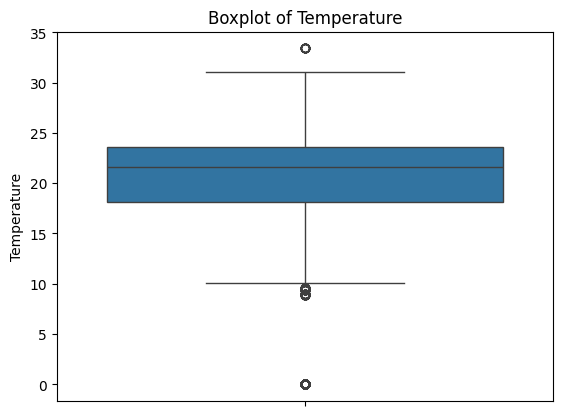

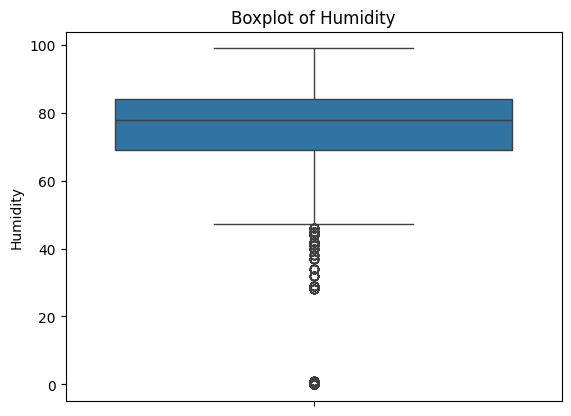

Analysis for Prince William Forest Park
               Year                           Date         Visit  \
count  29110.000000                          29110  29110.000000   
mean    2011.920268  2012-05-23 04:06:59.484713216      1.483545   
min     2007.000000            2007-05-29 00:00:00      1.000000   
25%     2009.000000            2009-07-08 00:00:00      1.000000   
50%     2012.000000            2012-07-01 00:00:00      1.000000   
75%     2014.000000            2014-06-28 00:00:00      2.000000   
max     2017.000000            2017-07-16 00:00:00      3.000000   
std        3.115423                            NaN      0.500081   

         AcceptedTSN   NPSTaxonCode   Temperature     Humidity  
count   29093.000000   29110.000000  29110.000000  29110.00000  
mean   261546.118242  151489.610237     21.065455     80.64913  
min    174773.000000       0.000000      0.000000      0.00000  
25%    178359.000000   85846.000000     19.000000     78.00000  
50%    179021.000000  

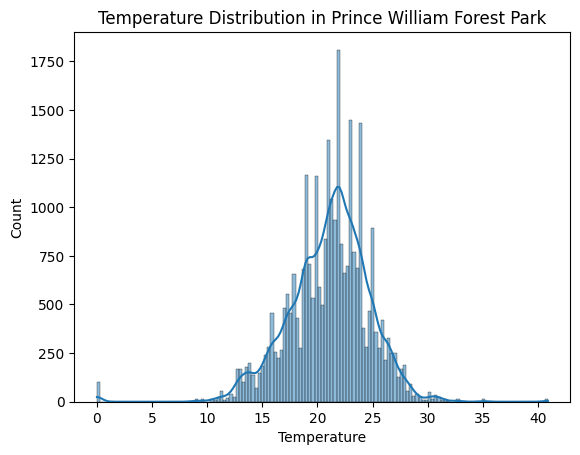

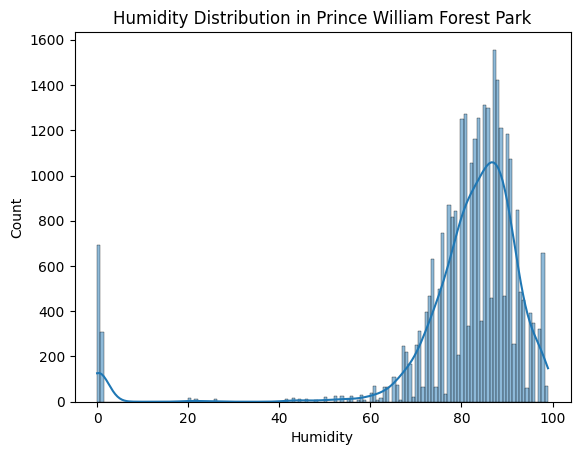

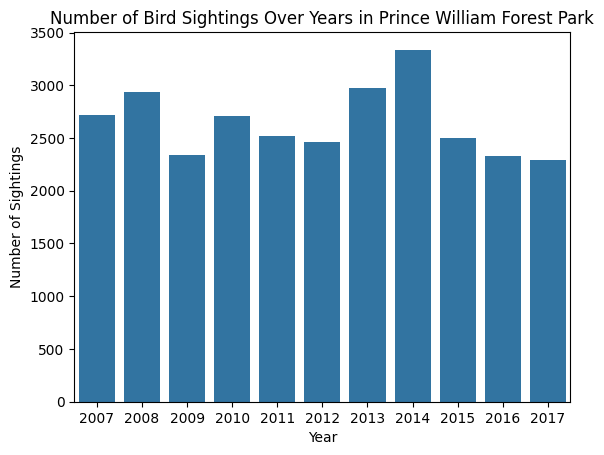

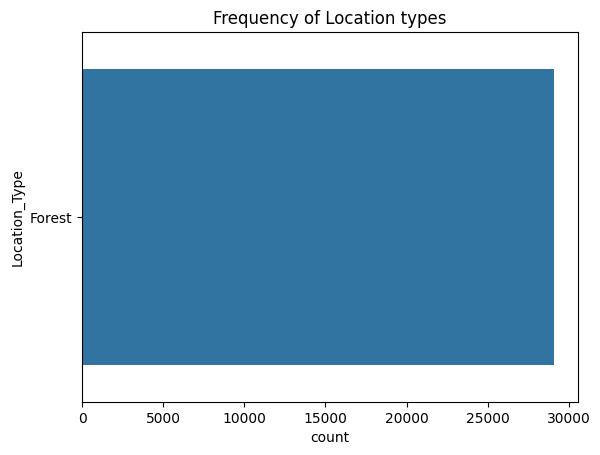

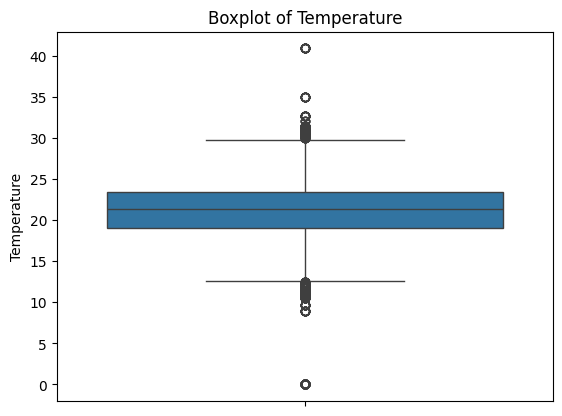

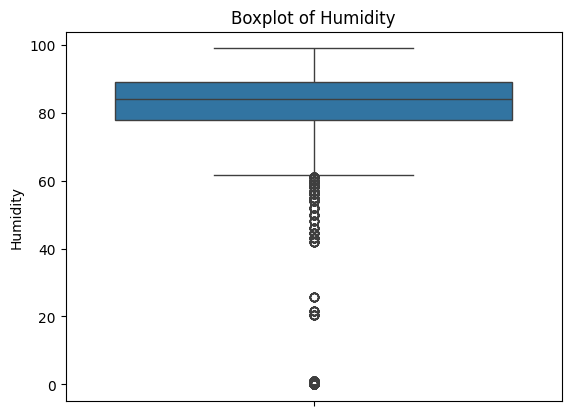

Analysis for Rock Creek Park
              Year                           Date        Visit    AcceptedTSN  \
count  3526.000000                           3526  3526.000000    3523.000000   
mean   2011.802609  2012-03-29 21:49:18.820193024     1.496313  223639.602044   
min    2007.000000            2007-05-09 00:00:00     1.000000  174773.000000   
25%    2009.000000            2009-05-30 00:00:00     1.000000  178359.000000   
50%    2012.000000            2012-05-31 00:00:00     1.000000  179124.000000   
75%    2014.000000            2014-06-23 00:00:00     2.000000  179759.000000   
max    2017.000000            2017-06-30 00:00:00     2.000000  950106.000000   
std       3.180821                            NaN     0.500057  140655.540365   

        NPSTaxonCode  Temperature     Humidity  
count    3526.000000  3526.000000  3526.000000  
mean   115786.203630    20.475780    70.129070  
min         0.000000    11.200000     0.000000  
25%     85824.000000    18.600000    68.00000

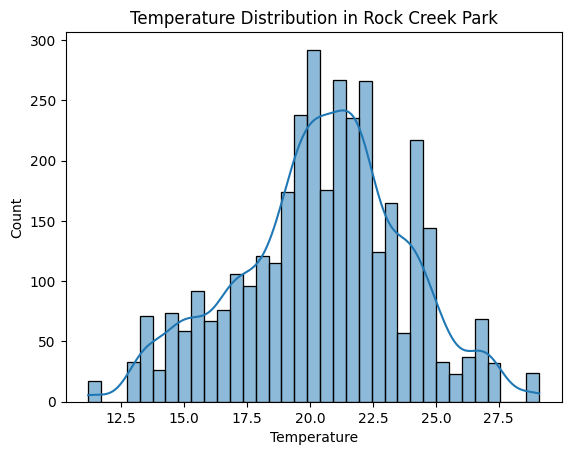

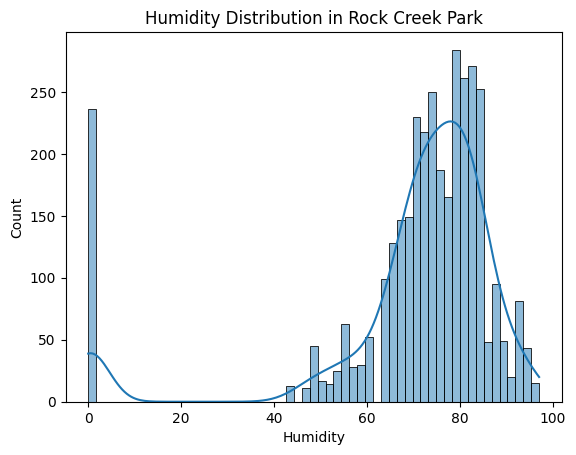

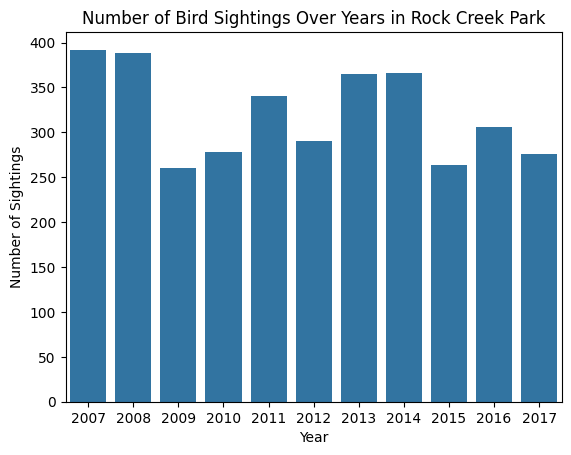

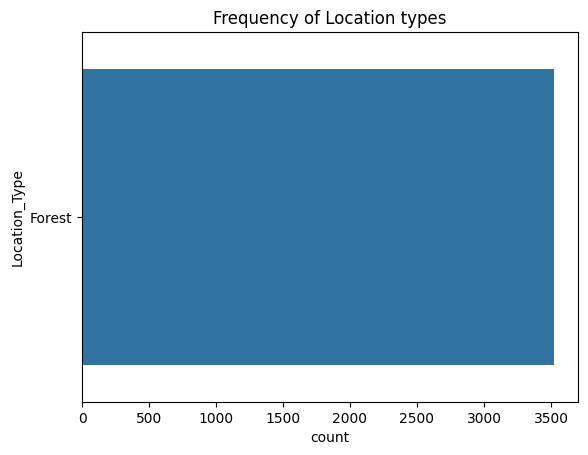

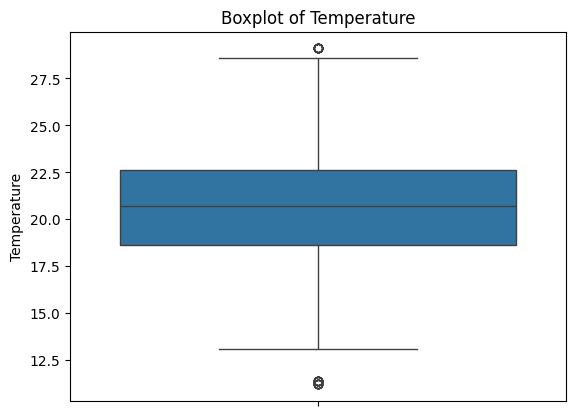

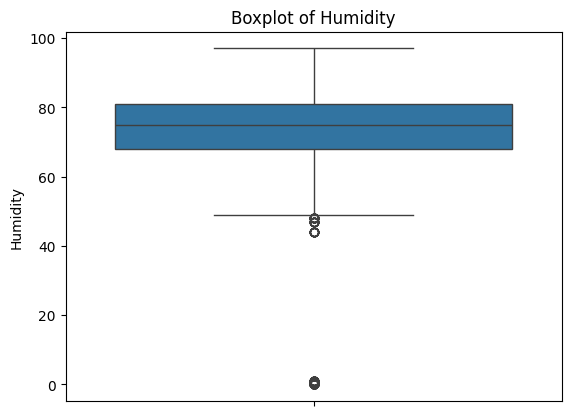

Analysis for Wolf Trap National Park for the Performing Arts
              Year                           Date       Visit    AcceptedTSN  \
count   657.000000                            657  657.000000     656.000000   
mean   2014.607306  2015-01-18 20:55:53.424657408    1.497717  245026.202744   
min    2007.000000            2007-05-10 00:00:00    1.000000  174999.000000   
25%    2014.000000            2014-06-06 00:00:00    1.000000  178541.000000   
50%    2015.000000            2015-05-29 00:00:00    1.000000  179124.000000   
75%    2016.000000            2016-06-22 00:00:00    2.000000  179759.000000   
max    2017.000000            2017-06-17 00:00:00    2.000000  950045.000000   
std       2.381549                            NaN    0.500376  146757.978633   

        NPSTaxonCode  Temperature    Humidity  
count     657.000000   657.000000  657.000000  
mean   122636.540335    22.110807   76.779757  
min     76625.000000    17.600000   36.000000  
25%     85846.000000    21

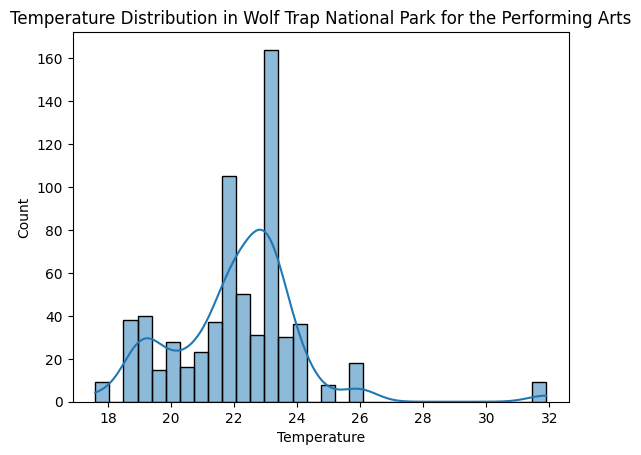

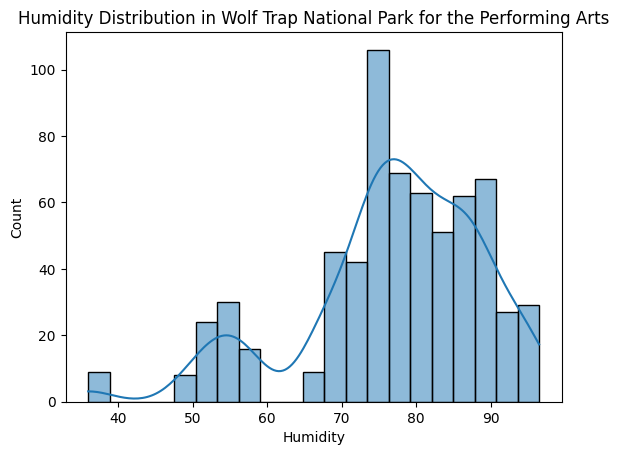

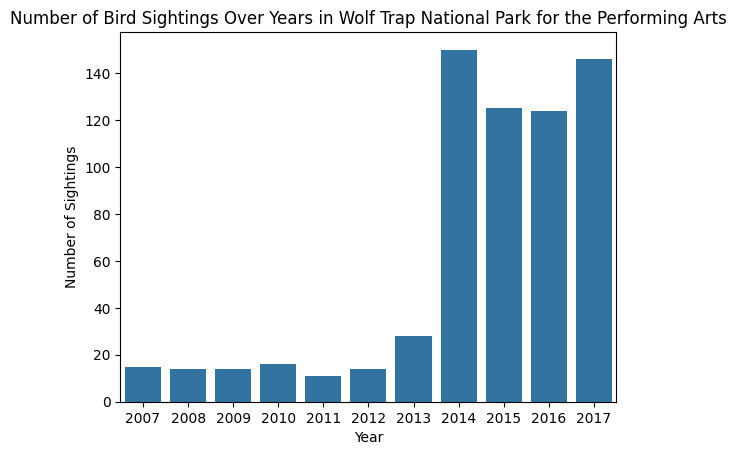

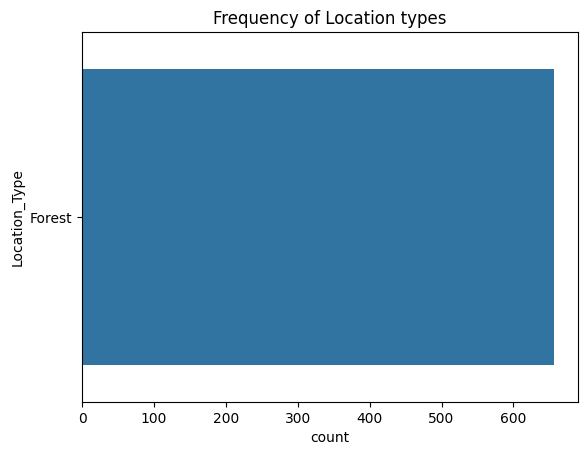

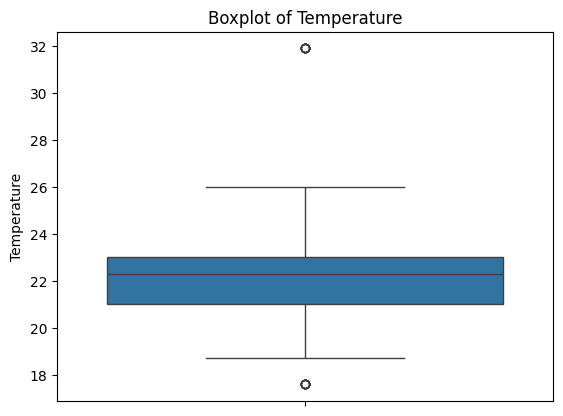

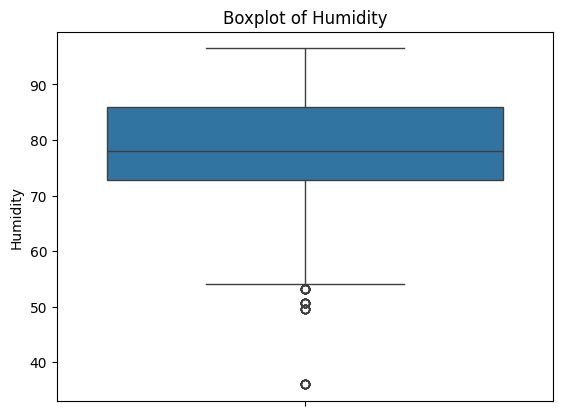

In [157]:
for park in parks:
    park_df=df[df['National Parks']==park]

    print(f"Analysis for {park}")
    print(park_df.describe())

    sns.histplot(park_df['Temperature'], kde=True)
    plt.title(f'Temperature Distribution in {park}')
    plt.show()

    sns.histplot(park_df['Humidity'], kde=True)
    plt.title(f'Humidity Distribution in {park}')
    plt.show()

    park_df.groupby('Year').size().plot()
    sns.barplot(park_df.groupby('Year').size())
    plt.title(f'Number of Bird Sightings Over Years in {park}')
    plt.xlabel('Year')
    plt.ylabel('Number of Sightings')
    plt.show()


    sns.countplot(park_df['Location_Type'])
    plt.title('Frequency of Location types')
    plt.show()

    sns.boxplot(park_df['Temperature'])
    plt.title('Boxplot of Temperature')
    plt.show()

    sns.boxplot(park_df['Humidity'])
    plt.title('Boxplot of Humidity')
    plt.show()

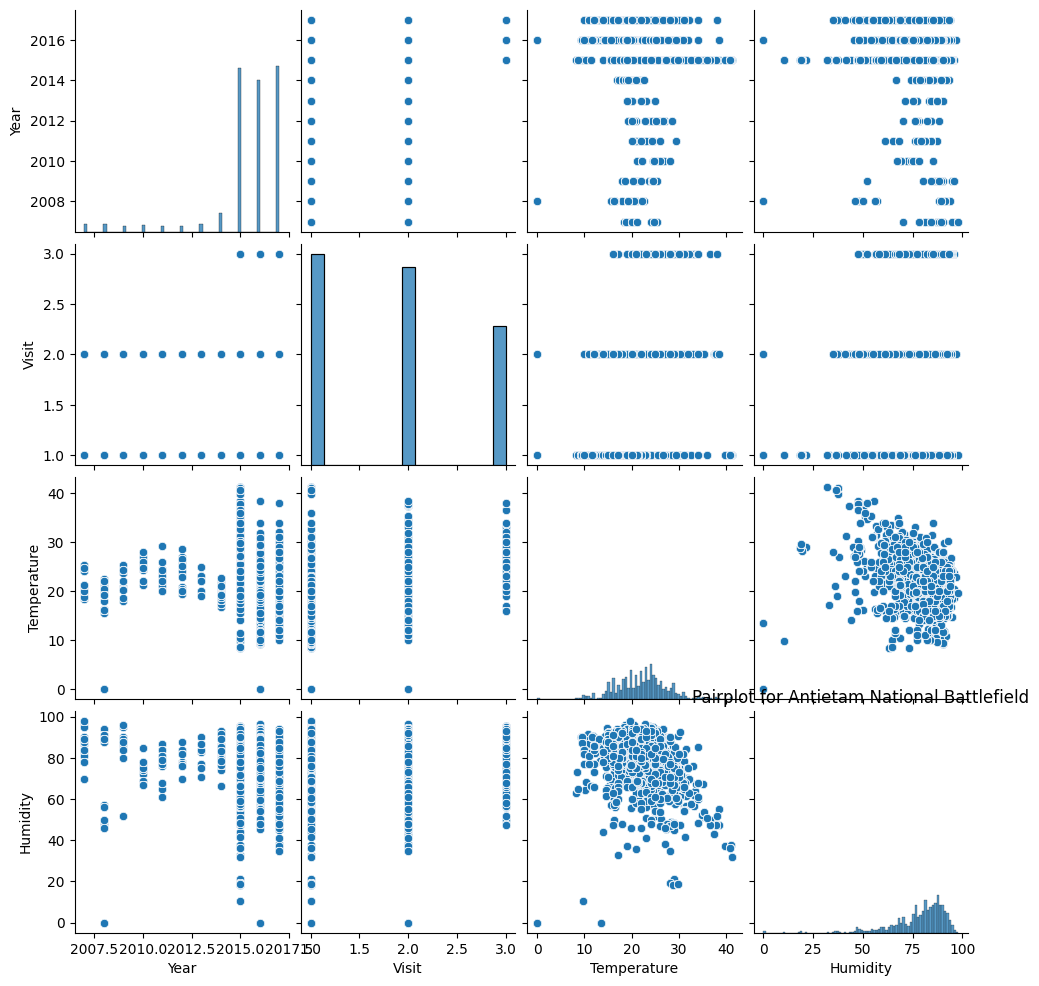

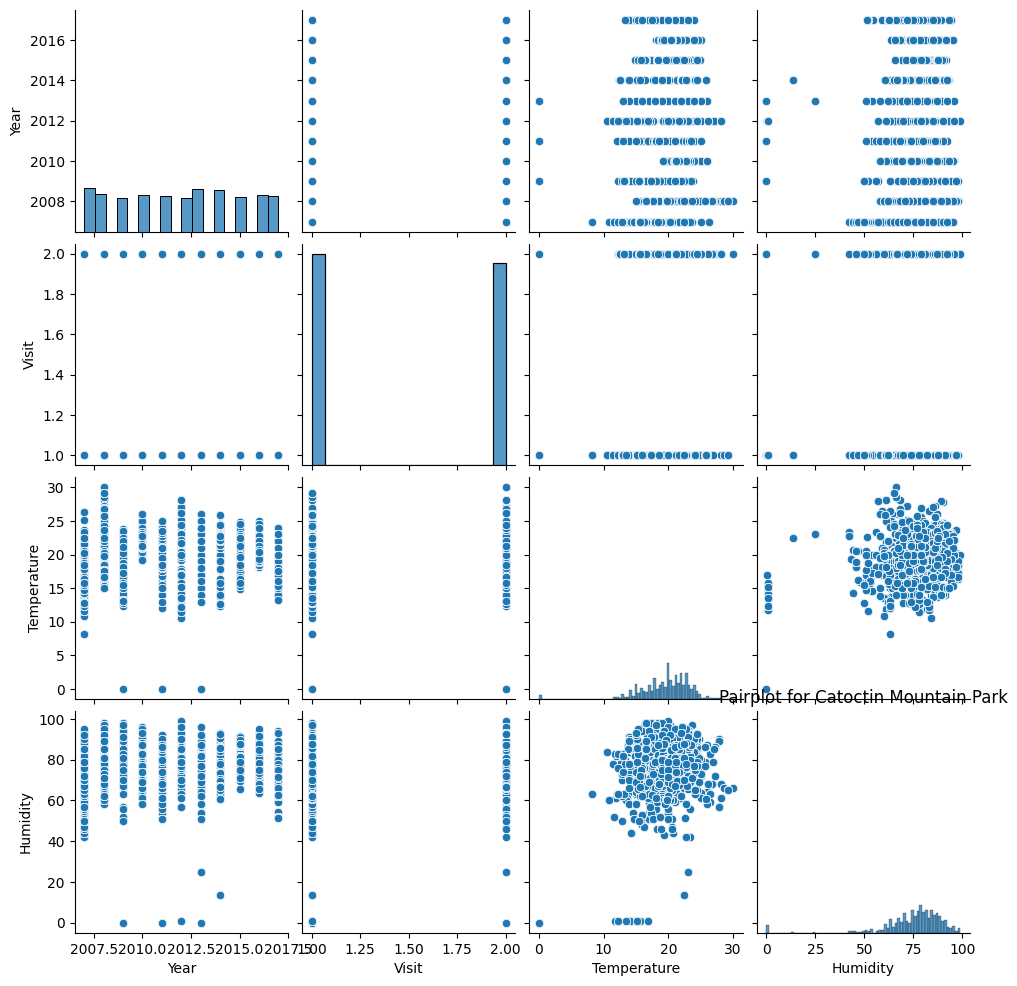

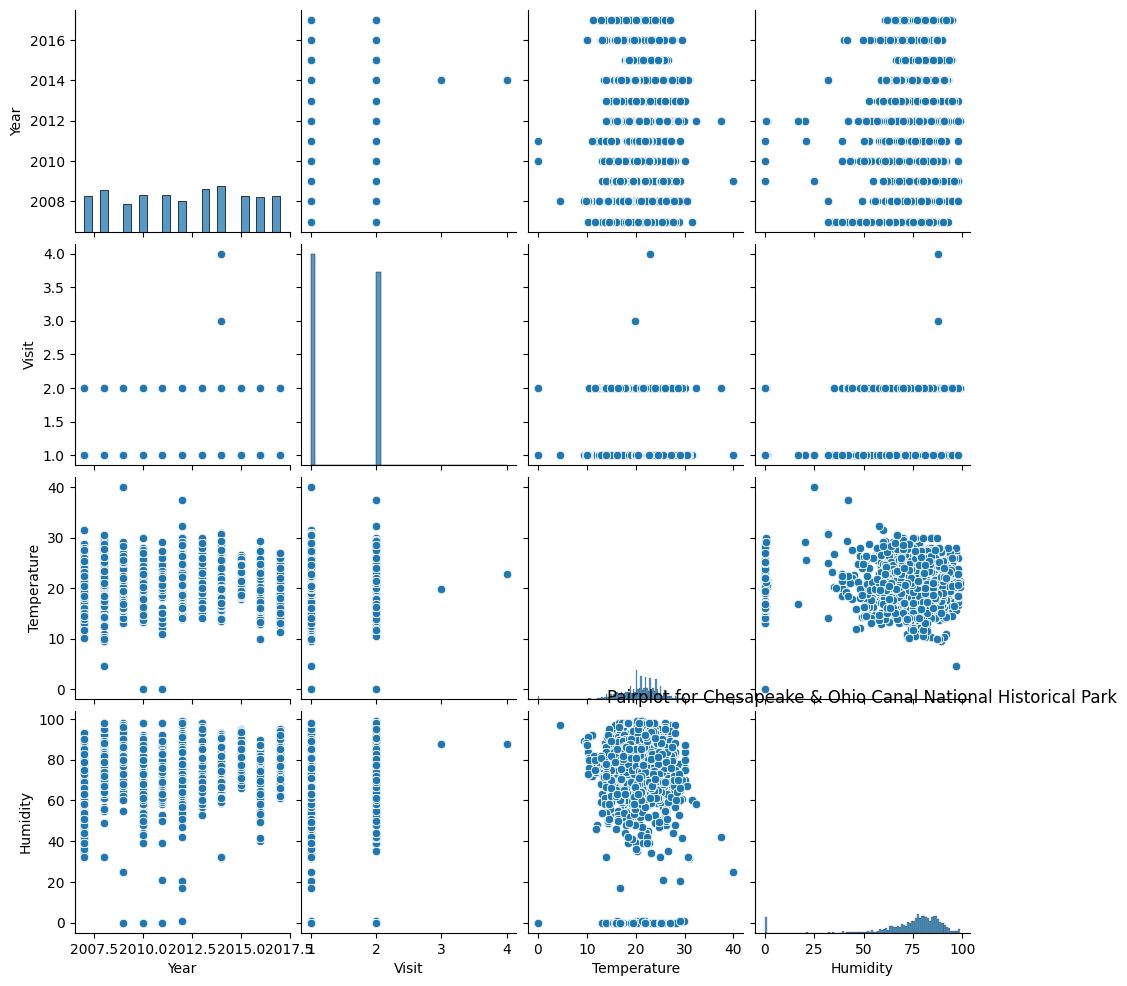

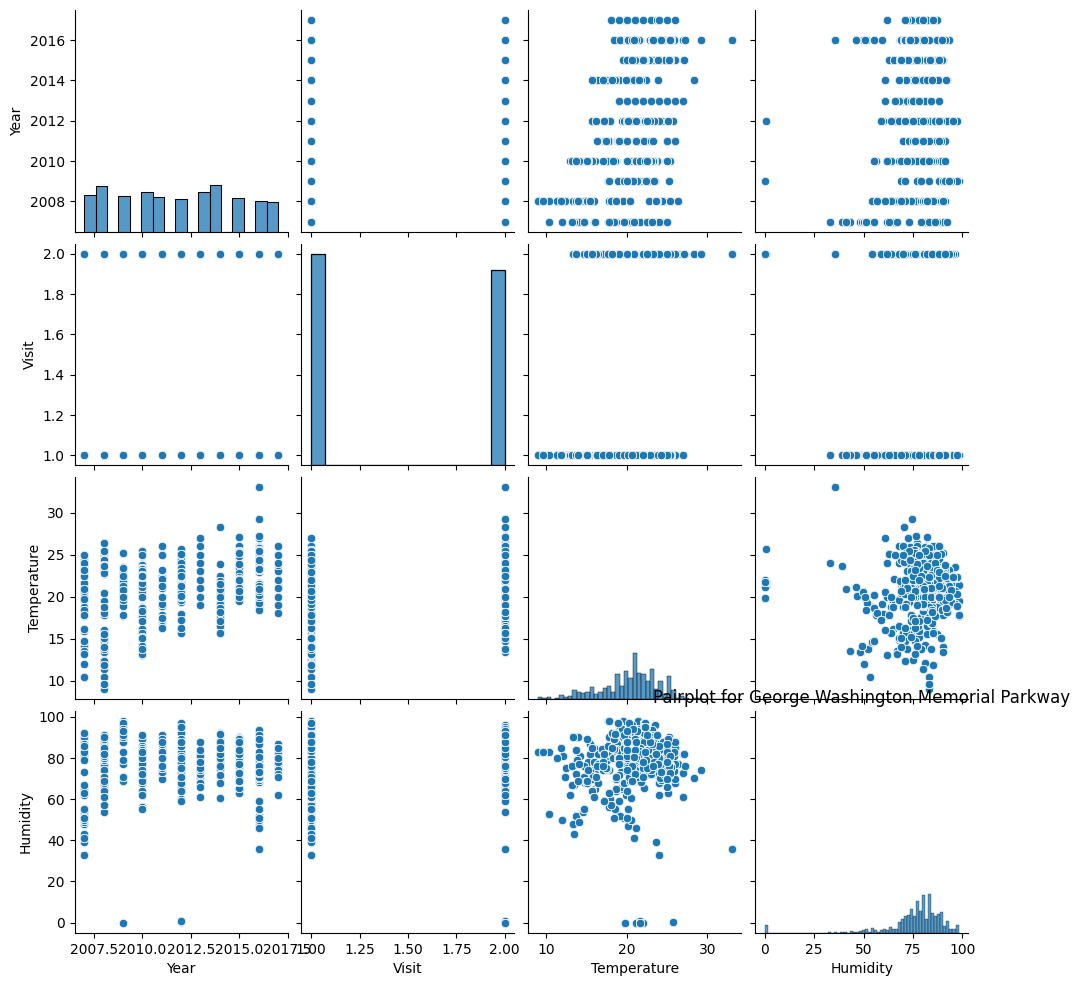

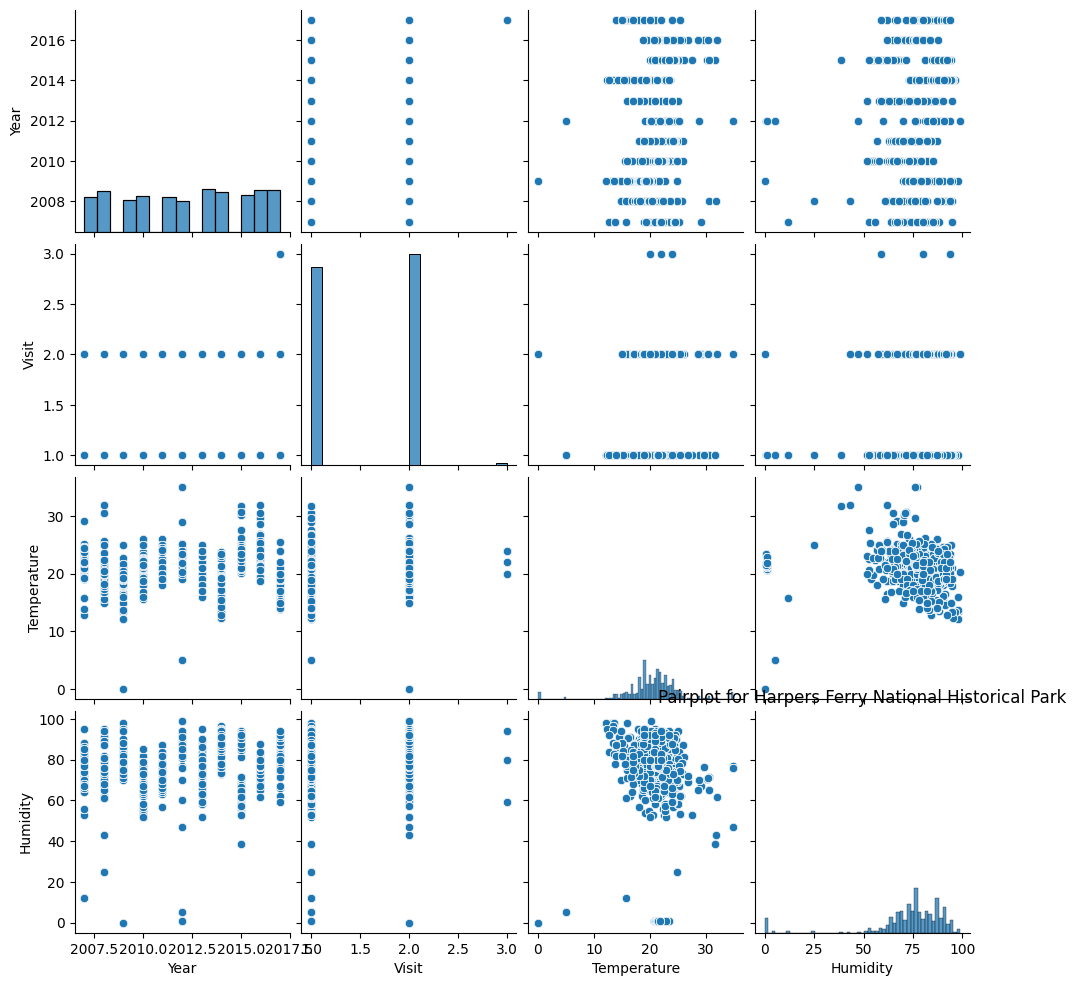

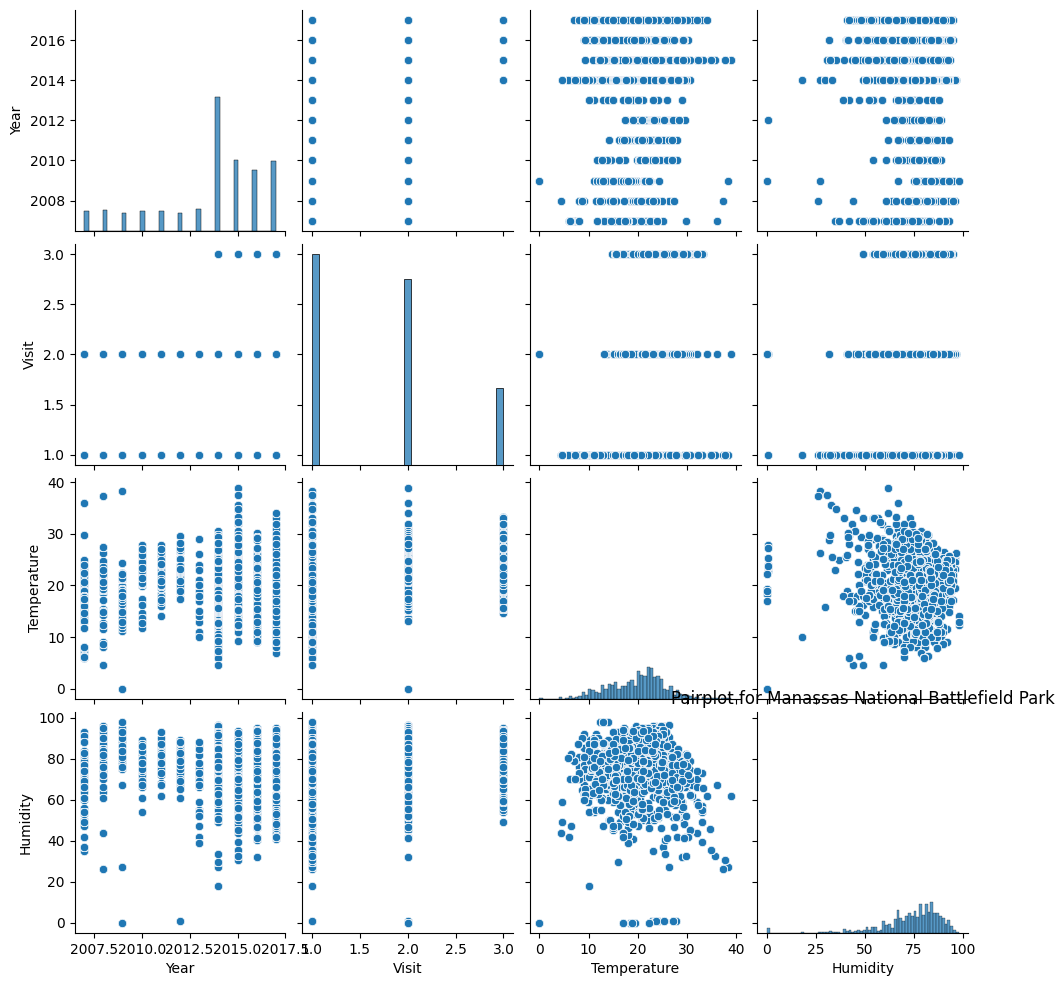

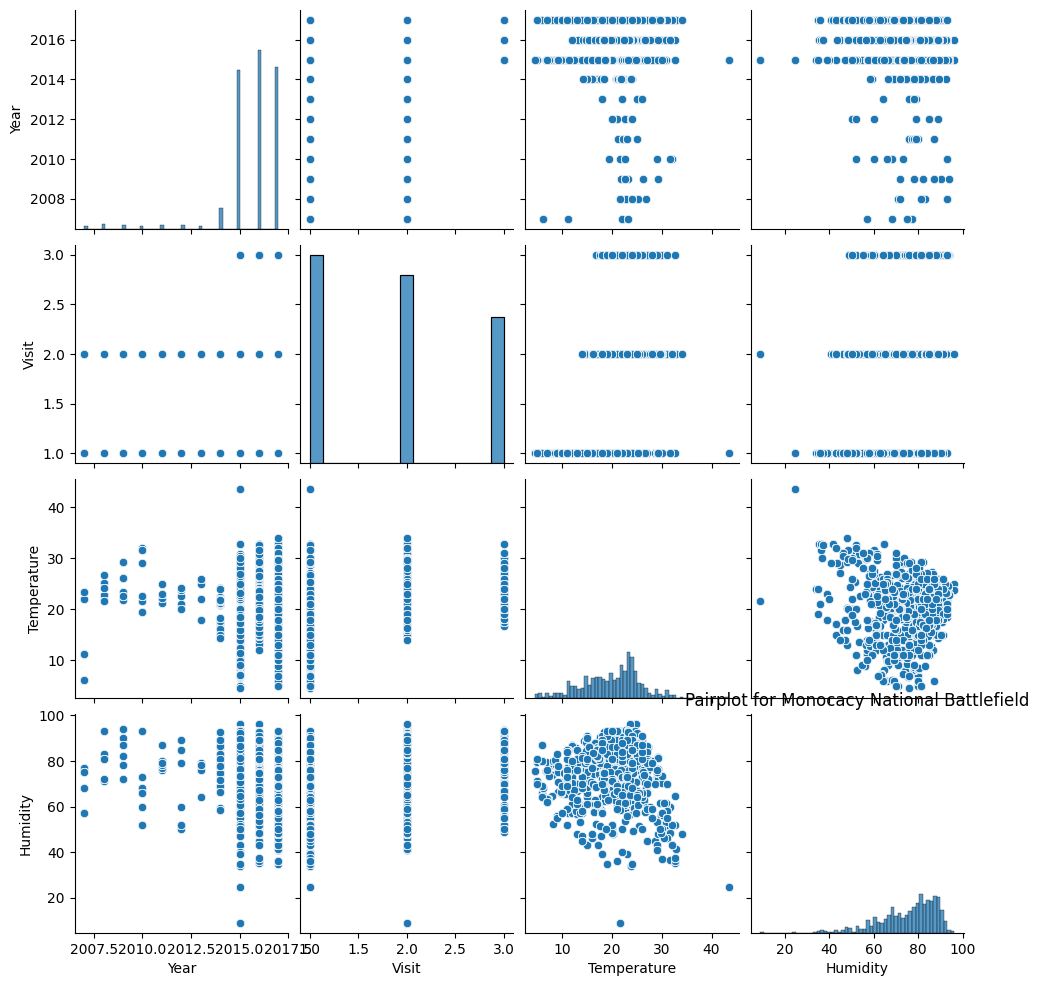

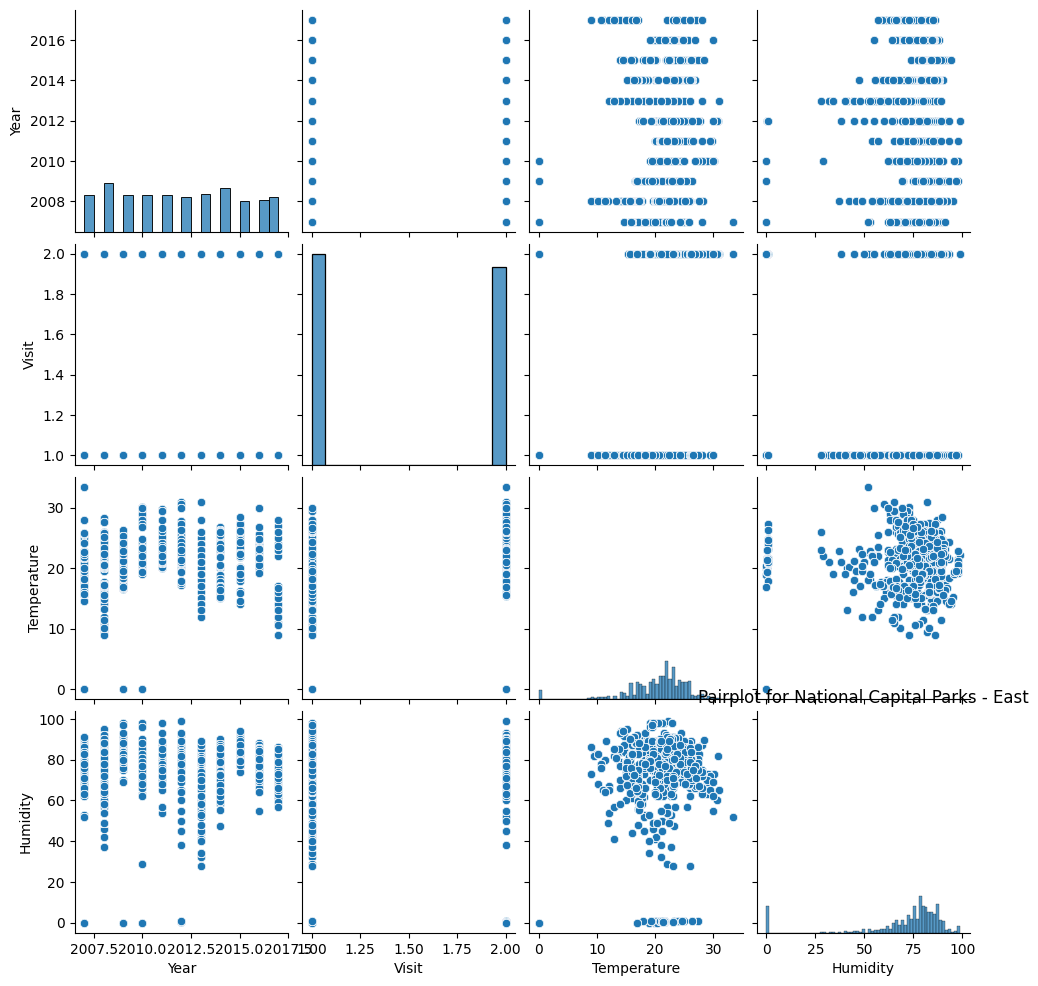

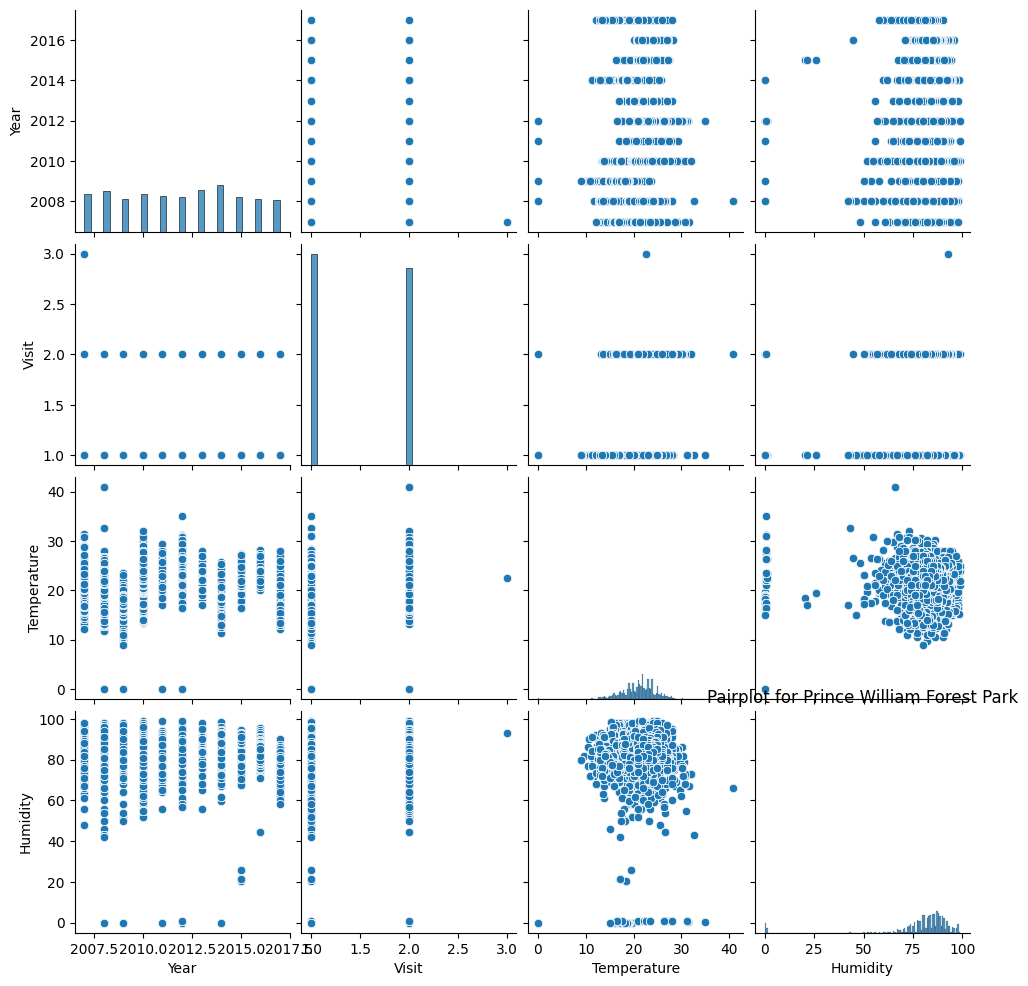

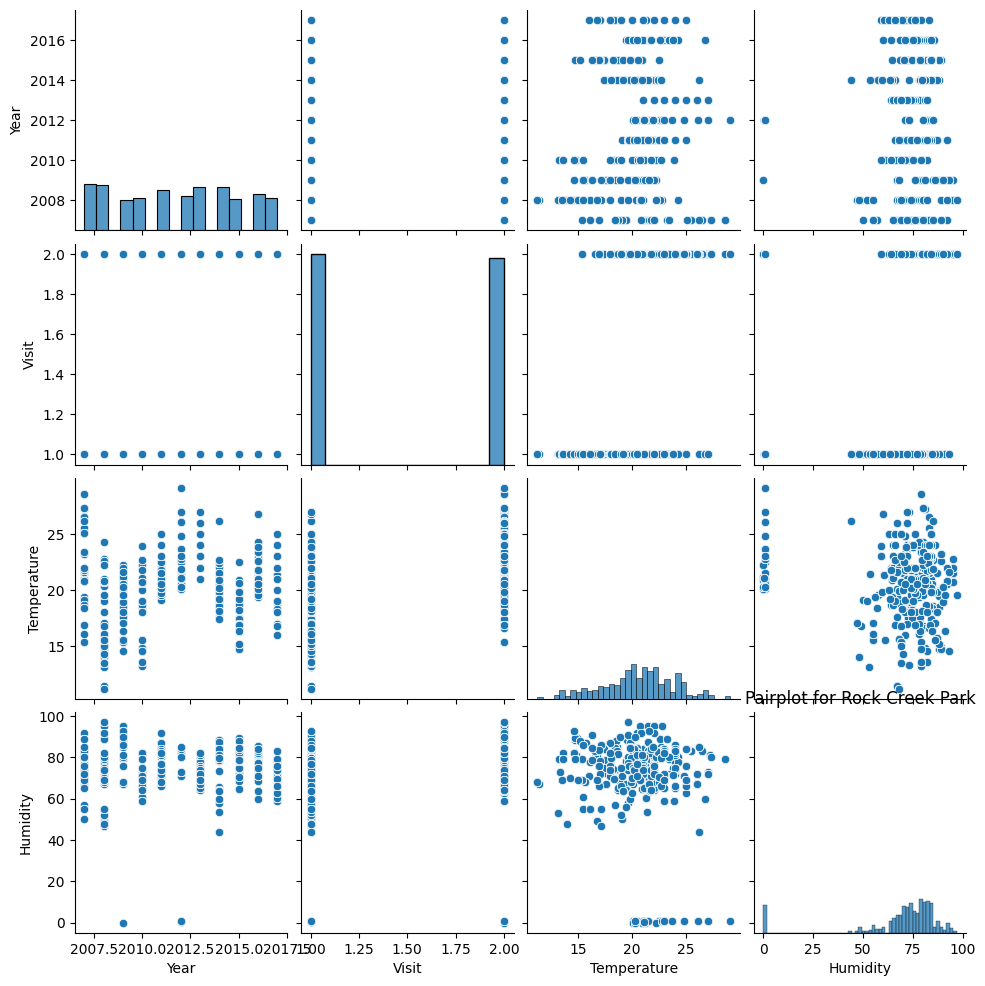

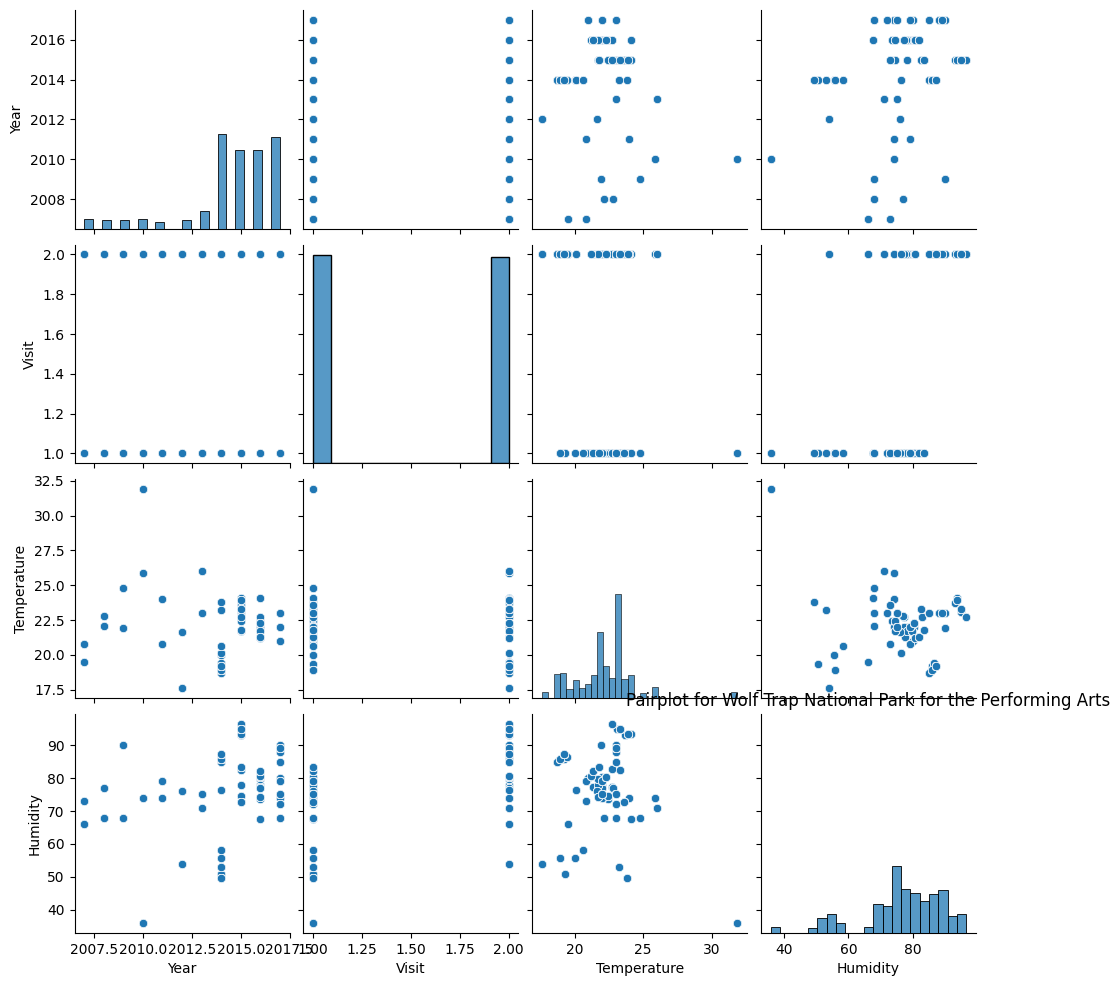

In [158]:
for park in parks:
    park_df=df[df['National Parks']==park]

    sns.pairplot(park_df[selected_num_cols])
    plt.title(f'Pairplot for {park}')
    plt.show()

In [159]:
plot_df=df[df['Plot_Name']=='HAFE-0118']

In [160]:
plot_df.sample(5)

Admin_Unit_Code Sub_Unit_Code Site_Name  Plot_Name Location_Type  Year  \
57326            HAFE           NaN    HAFE 2  HAFE-0118        Forest  2011   
55273            HAFE           NaN    HAFE 2  HAFE-0118        Forest  2007   
56170            HAFE           NaN    HAFE 2  HAFE-0118        Forest  2009   
59576            HAFE           NaN    HAFE 2  HAFE-0118        Forest  2016   
56869            HAFE           NaN    HAFE 2  HAFE-0118        Forest  2010   

            Date Start_Time  End_Time          Observer  ...  AOU_Code  \
57326 2011-06-26   09:42:00  09:54:00    James Petersen  ...      AMRO   
55273 2007-05-17   06:46:00  06:56:00   Desiree Narango  ...      DOWO   
56170 2009-05-27   06:10:00  06:20:00       Zak Poulton  ...      WEWA   
59576 2016-05-27   09:26:00  09:36:00    Brendan Hobart  ...      EAWP   
56869 2010-06-21   08:51:00  09:02:00  Elizabeth Tymkiw  ...      BLJA   

      PIF_Watchlist_Status Regional_Stewardship_Status Temperature  Humidity  \
57326                False                       False   20.000000      82.0   
55273                False                        True   13.800000      83.0   
56170                 True                        True   13.800000      78.0   
59576                False                        True   24.799999      71.0   
56869                False                       False   24.900000      76.0   

                       Sky                                       Wind  \
57326        Partly Cloudy      Calm (< 1 mph) smoke rises vertically   
55273        Partly Cloudy      Calm (< 1 mph) smoke rises vertically   
56170         Mist/Drizzle      Calm (< 1 mph) smoke rises vertically   
59576  Clear or Few Clouds  Light air movement (1-3 mph) smoke drifts   
56869  Clear or Few Clouds   Light breeze (4-7 mph) wind felt on face   

                   Disturbance  Initial_Three_Min_Cnt  \
57326  Serious effect on count                  False   
55273   Slight effect on count                  False   
56170   Slight effect on count                  False   
59576       No effect on count                  False   
56869       No effect on count                  False   

                               National Parks  
57326  Harpers Ferry National Historical Park  
55273  Harpers Ferry National Historical Park  
56170  Harpers Ferry National Historical Park  
59576  Harpers Ferry National Historical Park  
56869  Harpers Ferry National Historical Park  

[5 rows x 30 columns]

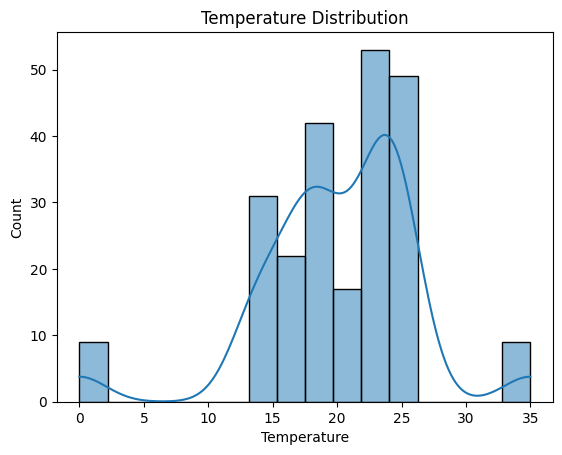

In [161]:
sns.histplot(plot_df['Temperature'], kde=True)
plt.title("Temperature Distribution")
plt.show()

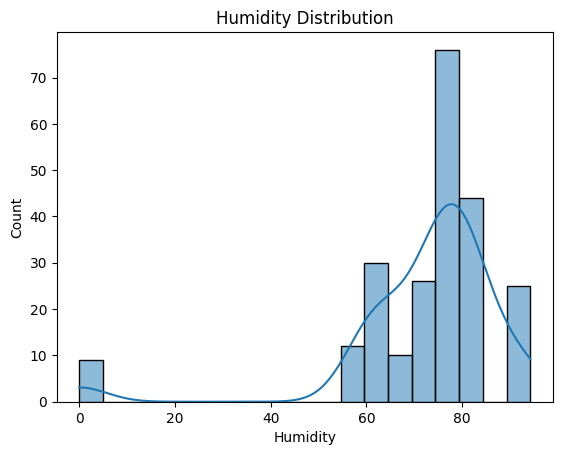

In [162]:
sns.histplot(plot_df['Humidity'], kde=True)
plt.title("Humidity Distribution")
plt.show()

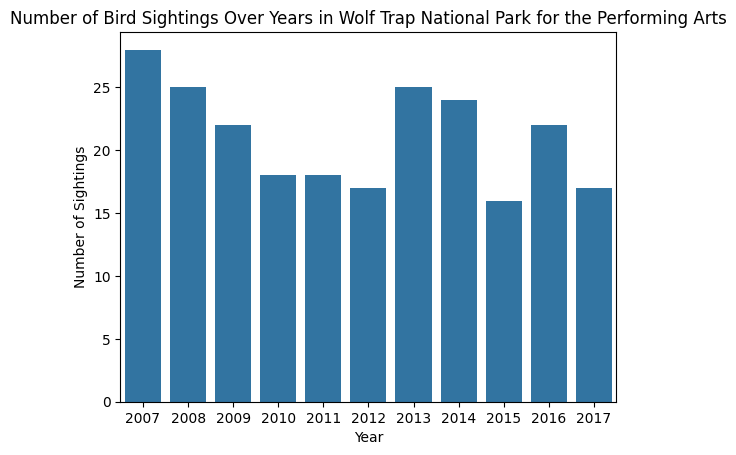

In [163]:
plot_df.groupby('Year').size().plot()
sns.barplot(plot_df.groupby('Year').size())
plt.title(f'Number of Bird Sightings Over Years in {park}')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.show()

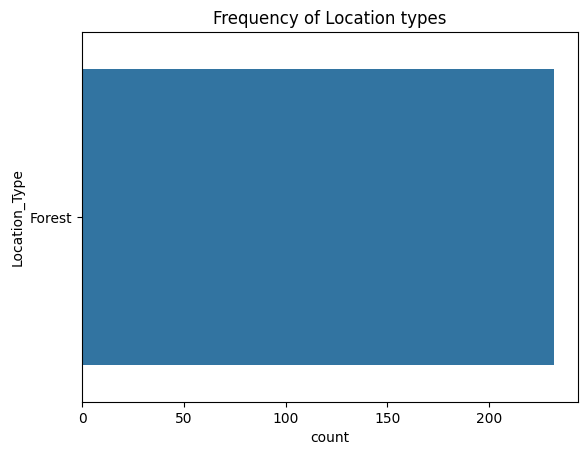

In [164]:
sns.countplot(plot_df['Location_Type'])
plt.title('Frequency of Location types')
plt.show()

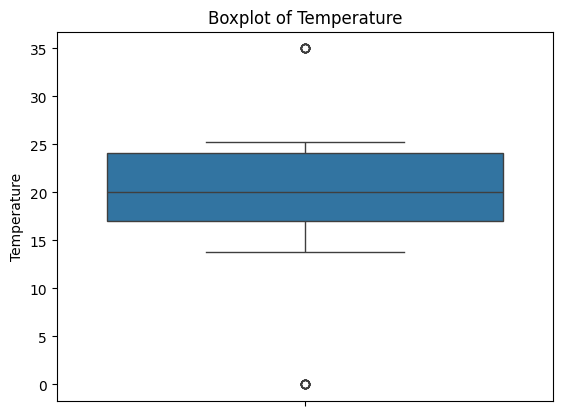

In [165]:
sns.boxplot(plot_df['Temperature'])
plt.title('Boxplot of Temperature')
plt.show()

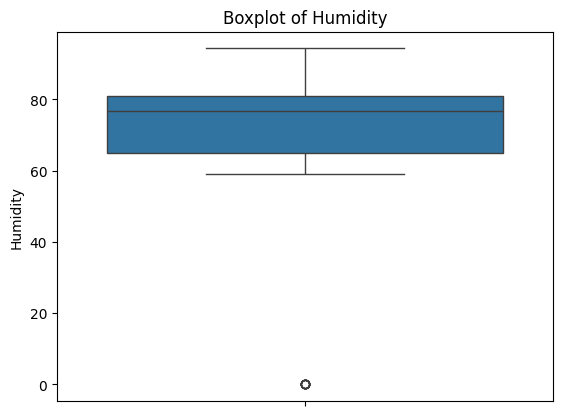

In [166]:
sns.boxplot(plot_df['Humidity'])
plt.title('Boxplot of Humidity')
plt.show()

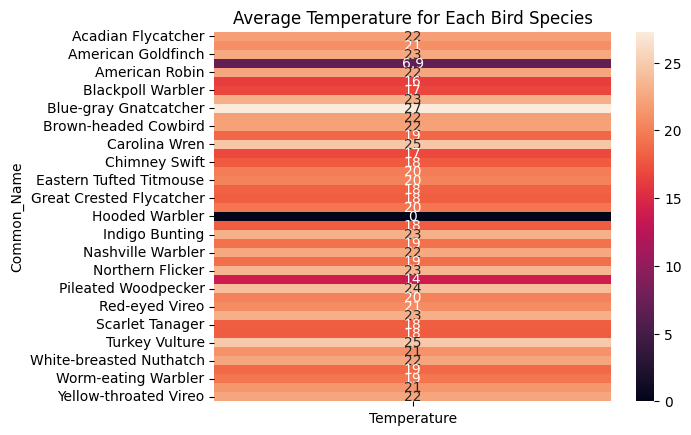

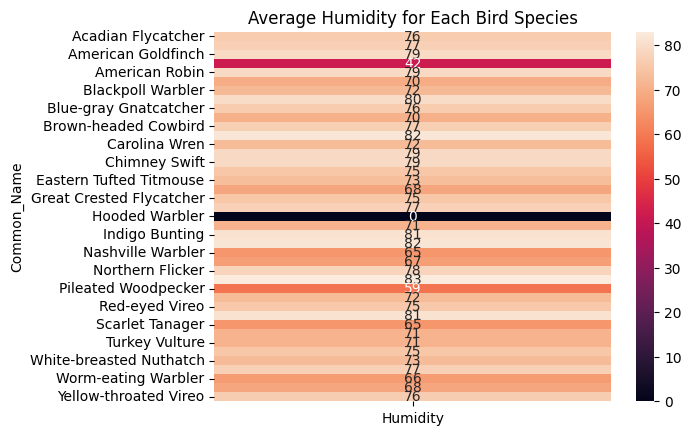

In [167]:
pivot_table=plot_df.pivot_table(values='Temperature', index='Common_Name', aggfunc='mean')
sns.heatmap(pivot_table, annot=True)
plt.title('Average Temperature for Each Bird Species')
plt.show()

pivot_table=plot_df.pivot_table(values='Humidity', index='Common_Name', aggfunc='mean')
sns.heatmap(pivot_table, annot=True)
plt.title('Average Humidity for Each Bird Species')
plt.show()

In [168]:
model_df=df.loc[:,['National Parks', 'Plot_Name', 'Year', 'Date', 'Location_Type', 'Common_Name', 'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance']]

In [169]:
model_df['Month']=model_df['Date'].dt.month
model_df['Day']=model_df['Date'].dt.day
model_df.drop(columns=['Date'], inplace=True)

In [170]:
model_df=model_df.loc[:,['National Parks', 'Plot_Name', 'Year', 'Month', 'Day', 'Location_Type', 'Common_Name', 'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance']]

In [171]:
model_df.sample(5)

National Parks  Plot_Name  Year  \
13042                      Antietam National Battlefield  ANTI-0104  2017   
89531                      National Capital Parks - East  NACE-0487  2009   
108304                        Prince William Forest Park  PRWI-0276  2012   
27638   Chesapeake & Ohio Canal National Historical Park  CHOH-1036  2015   
109895                        Prince William Forest Park  PRWI-0282  2013   

        Month  Day Location_Type            Common_Name  Temperature  \
13042       5   28     Grassland    Grasshopper Sparrow    15.000000   
89531       7    3        Forest  Blue-gray Gnatcatcher     0.000000   
108304      7    7        Forest          Mourning Dove    30.200001   
27638       5   31        Forest    Pileated Woodpecker    25.000000   
109895      6   11        Forest    Worm-eating Warbler    20.000000   

        Humidity                  Sky  \
13042       89.0      Cloudy/Overcast   
89531        0.0        Partly Cloudy   
108304      76.0  Clear or Few Clouds   
27638       74.0  Clear or Few Clouds   
109895      90.0      Cloudy/Overcast   

                                             Wind             Disturbance  
13042    Light breeze (4-7 mph) wind felt on face  Slight effect on count  
89531       Calm (< 1 mph) smoke rises vertically      No effect on count  
108304      Calm (< 1 mph) smoke rises vertically      No effect on count  
27638   Light air movement (1-3 mph) smoke drifts      No effect on count  
109895      Calm (< 1 mph) smoke rises vertically  Slight effect on count

In [172]:
model_df.isnull().sum()

National Parks    0
Plot_Name         0
Year              0
Month             0
Day               0
Location_Type     0
Common_Name       0
Temperature       0
Humidity          0
Sky               0
Wind              0
Disturbance       0
dtype: int64

In [173]:
model_df.shape

(126455, 12)

In [174]:
model_df.columns

Index(['National Parks', 'Plot_Name', 'Year', 'Month', 'Day', 'Location_Type',
       'Common_Name', 'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance'],
      dtype='object')

In [175]:
print("Categories in Categorical columns:")
print("National Parks:",model_df['National Parks'].unique())
print("Plot_Name:",model_df['Plot_Name'].unique())
print("Location_Type:",model_df['Location_Type'].unique())
print("Common_Name:",model_df['Common_Name'].unique())
print("Sky:",model_df['Sky'].unique())
print("Wind:",model_df['Wind'].unique())
print("Disturbance:",model_df['Disturbance'].unique())

Categories in Categorical columns:
National Parks: ['Antietam National Battlefield' 'Catoctin Mountain Park'
 'Chesapeake & Ohio Canal National Historical Park'
 'George Washington Memorial Parkway'
 'Harpers Ferry National Historical Park'
 'Manassas National Battlefield Park' 'Monocacy National Battlefield'
 'National Capital Parks - East' 'Prince William Forest Park'
 'Rock Creek Park' 'Wolf Trap National Park for the Performing Arts']
Plot_Name: ['ANTI-0207' 'ANTI-0072' 'ANTI-0201' 'ANTI-0194' 'ANTI-0206' 'ANTI-0078'
 'ANTI-0190' 'ANTI-0052' 'ANTI-0185' 'ANTI-0200' 'ANTI-0036' 'ANTI-0025'
 'ANTI-0092' 'ANTI-0082' 'ANTI-0145' 'ANTI-0151' 'ANTI-0150' 'ANTI-0149'
 'ANTI-0148' 'ANTI-0147' 'ANTI-0153' 'ANTI-0154' 'ANTI-0155' 'ANTI-0156'
 'ANTI-0163' 'ANTI-0162' 'ANTI-0161' 'ANTI-0160' 'ANTI-0181' 'ANTI-0180'
 'ANTI-0188' 'ANTI-0189' 'ANTI-0191' 'ANTI-0192' 'ANTI-0199' 'ANTI-0177'
 'ANTI-0171' 'ANTI-0170' 'ANTI-0169' 'ANTI-0176' 'ANTI-0175' 'ANTI-0174'
 'ANTI-0182' 'ANTI-0183' 'ANTI-0184

In [176]:
num_features=[feature for feature in model_df.columns if model_df[feature].dtype!='O']
cat_features=[feature for feature in model_df.columns if model_df[feature].dtype=='O']

print("Numerical features:", num_features)
print("Categorical features:", cat_features)

Numerical features: ['Year', 'Month', 'Day', 'Temperature', 'Humidity']
Categorical features: ['National Parks', 'Plot_Name', 'Location_Type', 'Common_Name', 'Sky', 'Wind', 'Disturbance']


In [177]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import scipy.stats as stats
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

In [178]:
input_features=['National Parks', 'Plot_Name', 'Year', 'Month', 'Day', 'Location_Type', 'Common_Name']
output_features=['Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance']

In [179]:
X=model_df[input_features]
X.sample(5)

National Parks  Plot_Name  Year  \
84268                      Monocacy National Battlefield  MONO-0016  2017   
28060   Chesapeake & Ohio Canal National Historical Park  CHOH-0788  2014   
47428   Chesapeake & Ohio Canal National Historical Park  CHOH-0428  2012   
123781                                   Rock Creek Park  ROCR-0172  2011   
56891             Harpers Ferry National Historical Park  HAFE-0061  2010   

        Month  Day Location_Type              Common_Name  
84268       6   11     Grassland            Chimney Swift  
28060       6    7        Forest  Eastern Tufted Titmouse  
47428       7    3        Forest        Northern Cardinal  
123781      5   15        Forest           Common Grackle  
56891       6   21        Forest           Red-eyed Vireo

In [180]:
y=model_df[output_features]
y.sample(5)

Temperature   Humidity                  Sky  \
52571     23.100000  86.000000        Partly Cloudy   
126136    22.000000  77.099998  Clear or Few Clouds   
110405    24.000000  84.000000      Cloudy/Overcast   
77030     23.799999  88.300003        Partly Cloudy   
46605     16.400000  88.599998  Clear or Few Clouds   

                                             Wind              Disturbance  
52571       Calm (< 1 mph) smoke rises vertically       No effect on count  
126136      Calm (< 1 mph) smoke rises vertically  Serious effect on count  
110405      Calm (< 1 mph) smoke rises vertically   Slight effect on count  
77030    Light breeze (4-7 mph) wind felt on face   Slight effect on count  
46605   Light air movement (1-3 mph) smoke drifts       No effect on count

In [181]:
num_input_features=[feature for feature in X.columns if X[feature].dtype!='O']
cat_input_features=[feature for feature in X.columns if X[feature].dtype=='O']

print("Numerical features:", num_input_features)
print("Categorical features:", cat_input_features)

Numerical features: ['Year', 'Month', 'Day']
Categorical features: ['National Parks', 'Plot_Name', 'Location_Type', 'Common_Name']


In [182]:
num_output_features=[feature for feature in y.columns if y[feature].dtype!='O']
cat_output_features=[feature for feature in y.columns if y[feature].dtype=='O']

print("Numerical features:", num_output_features)
print("Categorical features:", cat_output_features)

Numerical features: ['Temperature', 'Humidity']
Categorical features: ['Sky', 'Wind', 'Disturbance']


In [183]:
num_transformer=StandardScaler()
ohe_transformer=OneHotEncoder()
le=LabelEncoder()

In [184]:
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder", ohe_transformer, cat_input_features),
        ("StandardScaler", num_transformer, num_input_features)
    ]
)

In [185]:
X=preprocessor.fit_transform(X)

In [186]:
X.shape

(126455, 825)

In [187]:
ohe_op_transformer=OneHotEncoder(sparse_output=False)
ss_op_transformer=StandardScaler()

In [188]:
output_pp=ColumnTransformer(
    [
        ('OneHotEncoder', ohe_op_transformer, cat_output_features),
        ('StandardScaler', ss_op_transformer, num_output_features)
    ]
)

In [189]:
y=output_pp.fit_transform(y)

In [190]:
print(y[0])
print(y.shape)

cat_data = y[0][:16].reshape(1,-1)

[ 0.          1.          0.          0.          0.          0.
  1.          0.          0.          0.          0.          0.
  0.          1.          0.          0.         -1.11911452 -1.1234689 ]
(126455, 18)


In [191]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [192]:
def evaluate_model(true, predicted):
    mae=mean_absolute_error(true, predicted)
    mse=mean_squared_error(true, predicted)
    rmse=np.sqrt(mean_squared_error(true, predicted))
    r2_=r2_score(true, predicted)
    return mae, rmse, r2_

In [193]:
models={
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
}

In [199]:
model_list=[]

In [200]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    if(model_name == "Random Forest Regressor"):
        Prototype = model 
    
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    model_list.append(model_name)
    
    print(f"Model: {model_name}")
    print("- Root Mean Squared Error (Train):", model_train_rmse * 100)
    print("- Mean Absolute Error (Train):", model_train_mae * 100)
    print("- R2 Score (Train):", model_train_r2 * 100)
    print("- Root Mean Squared Error (Test):", model_test_rmse * 100)
    print("- Mean Absolute Error (Test):", model_test_mae * 100)
    print("- R2 Score (Test):", model_test_r2 * 100)
    
    print('=' * 35)
    print('\n')

Model: Linear Regression
- Root Mean Squared Error (Train): 42.21004502474822
- Mean Absolute Error (Train): 24.340663372579343
- R2 Score (Train): 14.611138339366589
- Root Mean Squared Error (Test): 42.646640607539894
- Mean Absolute Error (Test): 24.550118251353
- R2 Score (Test): 12.836377594701442


Model: Lasso
- Root Mean Squared Error (Train): 46.17401366532279
- Mean Absolute Error (Train): 28.183354146910716
- R2 Score (Train): -1.2335811384723961e-15
- Root Mean Squared Error (Test): 46.25773542781063
- Mean Absolute Error (Test): 28.19938304680712
- R2 Score (Test): -0.0034949219878319423


Model: Ridge
- Root Mean Squared Error (Train): 42.212140696766824
- Mean Absolute Error (Train): 24.35110929693776
- R2 Score (Train): 14.602377306948716
- Root Mean Squared Error (Test): 42.63827667001095
- Mean Absolute Error (Test): 24.555145899776104
- R2 Score (Test): 12.87760725100796


Model: K-Neighbors Regressor
- Root Mean Squared Error (Train): 24.70971550007204
- Mean Absolu

In [201]:
print(f"The best model is: {Prototype}")

The best model is: RandomForestRegressor()


In [202]:
def predict(input, model):
    dict__ = {'Year':input[0], "Month":input[1],"Day":input[2],"National Parks":input[3],"Plot_Name":input[4],"Location_Type":input[5],
            "Common_Name":input[6]}
    ip_array=pd.DataFrame([dict__])
    inputs = preprocessor.transform(ip_array)
    prediction=model.predict(inputs)
    cat = prediction[0][:16].reshape(1,-1)
    cat=output_pp.named_transformers_["OneHotEncoder"].inverse_transform(cat_data)
    cat_d = pd.DataFrame(cat,columns=cat_output_features)
    num_ = prediction[0][16:].reshape(1,-1)
    num_=output_pp.named_transformers_["StandardScaler"].inverse_transform(num_)
    num_d = pd.DataFrame(num_,columns=num_output_features)
    output_preds = pd.concat([cat_d,num_d],axis=1)
    print(output_preds)

In [204]:
year=int(input("Enter the year"))
month=int(input("Enter the month"))
day=int(input("Enter the Day"))
npark=input("Enter the National Park Name")
pname=input("Enter Plot_name")
location_type=input("Enter Location Type")
comm_name=input("Enter the Common Name of the bird")
ip_list=[ year, month, day,npark, pname, location_type, comm_name]

predict(ip_list, Prototype)

               Sky                                   Wind         Disturbance  \
0  Cloudy/Overcast  Calm (< 1 mph) smoke rises vertically  No effect on count   

   Temperature   Humidity  
0       21.682  78.923998  
